# Wesleyan University MOOC: Data Management and Visualisation
# Childhood Obesity and Social Deprivation in England
Beginning 11 June 2018

DATA SOURCE FILES have been created using file W_data_wrangling04.py
that is available in my code book at:
https://www.dropbox.com/s/r46h2imc95m9ycm/Childhood%20Obesity%20and%20Social%20Deprivation%20Study_V01a.docx?dl=0

This file is reworked for a Jupyter notebook.

## Course One Week Two

### Get the basics set up

In [1]:
# import python packages that will be used in project
import csv
import numpy as np # <= short name for numpy is np
import pandas as pd # <= short name for pandas is pd
import matplotlib.pyplot as plt # <= short name for matplotlib.pylot is plt
import seaborn as sns # <= short name for seaborn is sns
import scipy

# import the two data sets I will use to do with childhood obesity and social deprivation
# df45 is to do with obesity in 4-5-year olds, and df1011 is to do with obesity in 10-11-year old
df45 = pd.read_csv('/Users/RAhmed/WesleyanMOOC/W_data_store/csv_files/study_data45.csv')
df1011 = pd.read_csv('/Users/RAhmed/WesleyanMOOC/W_data_store/csv_files/study_data1011.csv')

# visually ensure all values are numeric where required
#print(df45.dtypes)
#print(df1011.dtypes)

# my data is numeric not categoric
# so to create a frequency chart from non-categoric variable need to create "bins"
# I'll use pd.cut and break into deciles (i.e. cut data at 10 equally-spaced intervals)
decile_list = ['decile ' + str(x+1) for x in range(10)]

### Set up and print frequency tables

In [2]:
# either view with frequency table with name of deciles (e.g. decile 1) or by value. Comment out the one you don't want
#label = decile_list
label = None

# for 4-5-year olds
#  this is a frequency table for obesity in 4-5-year olds in a local authority area
# V list_45_obesity = ... allocates the numeric values into the bins
list_45_obesity = pd.cut(df45['Obesity proportion'], len(decile_list), right=True, 
                         labels=label, retbins=False, precision=3, include_lowest=True)
# V use the value_counts function given in Week 2's lectures
freq_table_45_obesity = list_45_obesity.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_45_obesity)

# V this is a frequency table for social deprivation (Index of Multiple Deprivation) in a local authority area
list_45_IMD = pd.cut(df45['IMD - Average score'], len(decile_list), right=True, labels=label, retbins=False, precision=3, include_lowest=True)
freq_table_45_IMD = list_45_IMD.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_45_IMD)

# V this is a frequency table for income per head (GDHI) in a local authority area
list_45_GDHI = pd.cut(df45['GDHI'], len(decile_list), right=True, labels=label, retbins=False, precision=3, include_lowest=True)
freq_table_45_GDHI = list_45_GDHI.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_45_GDHI)

# for 10-11-year olds, same as for 4-5-year olds
list_1011_obesity = pd.cut(df1011['Obesity proportion'], len(decile_list), right=True, labels=label, retbins=False, precision=3, include_lowest=True)
freq_table_1011_obesity = list_1011_obesity.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_1011_obesity)

list_1011_IMD = pd.cut(df1011['IMD - Average score'], len(decile_list), right=True, labels=label, retbins=False, precision=3, include_lowest=True)
freq_table_1011_IMD = list_1011_IMD.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_1011_IMD)

list_1011_GDHI = pd.cut(df1011['GDHI'], len(decile_list), right=True, labels=label, retbins=False, precision=3, include_lowest=True)
freq_table_1011_GDHI = list_1011_GDHI.value_counts(sort=False, dropna=False, normalize=False)
print(freq_table_1011_GDHI)

(2.996, 4.181]       2
(4.181, 5.354]       5
(5.354, 6.526]      27
(6.526, 7.699]      53
(7.699, 8.871]      68
(8.871, 10.044]     85
(10.044, 11.216]    48
(11.216, 12.389]    26
(12.389, 13.562]     5
(13.562, 14.734]     5
NaN                  2
Name: Obesity proportion, dtype: int64
(4.971, 8.708]      19
(8.708, 12.407]     51
(12.407, 16.105]    65
(16.105, 19.804]    50
(19.804, 23.503]    40
(23.503, 27.202]    40
(27.202, 30.901]    31
(30.901, 34.599]    17
(34.599, 38.298]     7
(38.298, 41.997]     6
Name: IMD - Average score, dtype: int64
(12345.692, 17527.7]     89
(17527.7, 22658.4]      166
(22658.4, 27789.1]       54
(27789.1, 32919.8]       11
(32919.8, 38050.5]        1
(38050.5, 43181.2]        0
(43181.2, 48311.9]        1
(48311.9, 53442.6]        1
(53442.6, 58573.3]        1
(58573.3, 63704.0]        2
Name: GDHI, dtype: int64
(9.421000000000001, 11.346]     5
(11.346, 13.25]                18
(13.25, 15.155]                45
(15.155, 17.059]               

## Course One Week Three

### Data Management Decisions

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/pyth

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/pyth

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/pyth

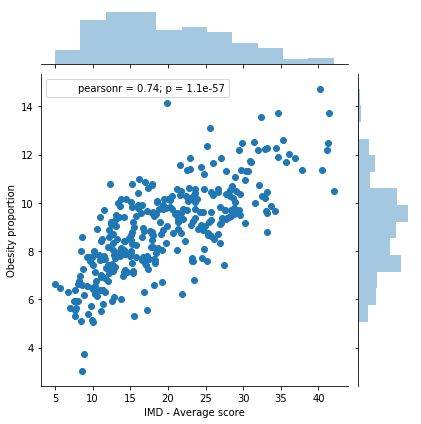

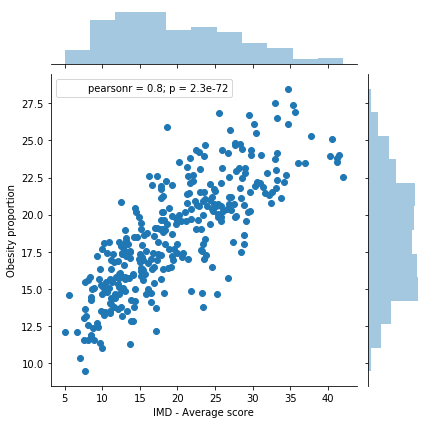

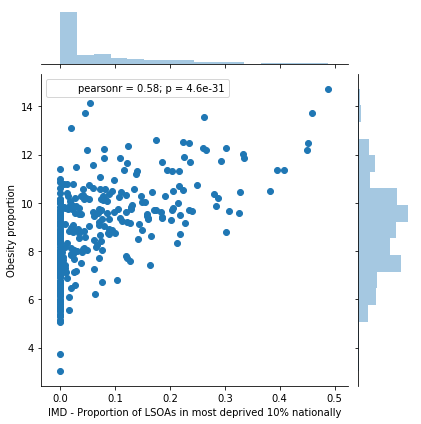

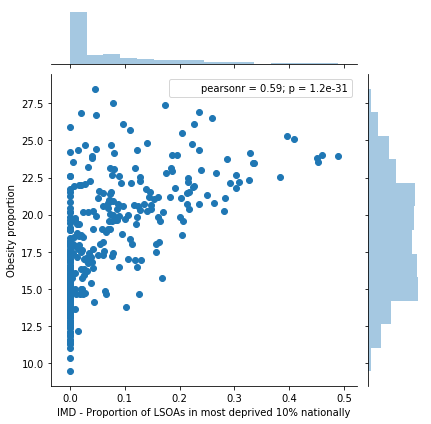

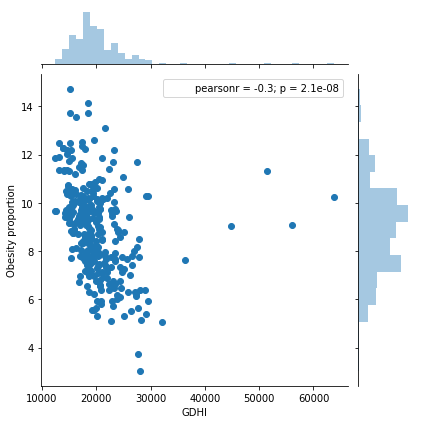

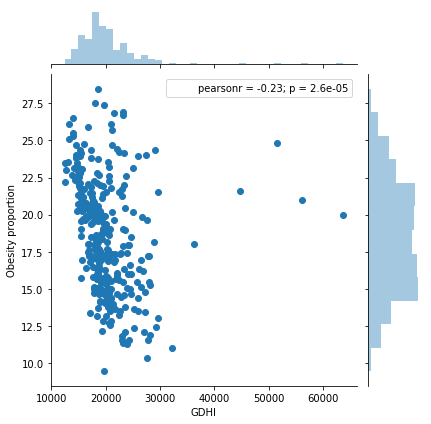

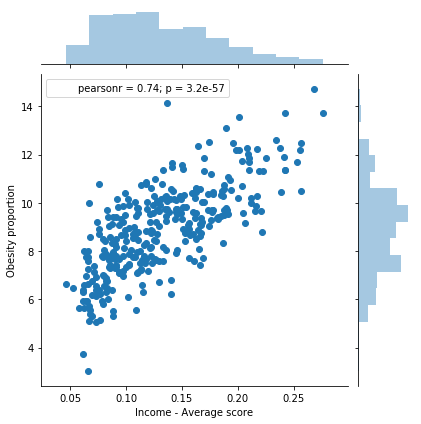

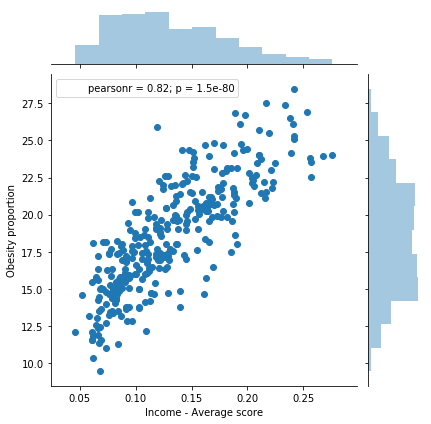

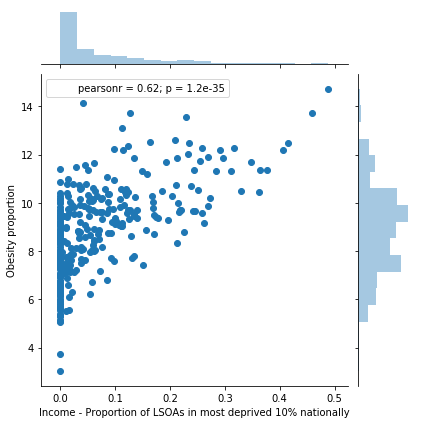

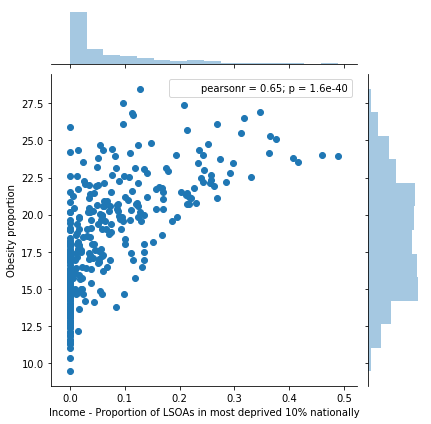

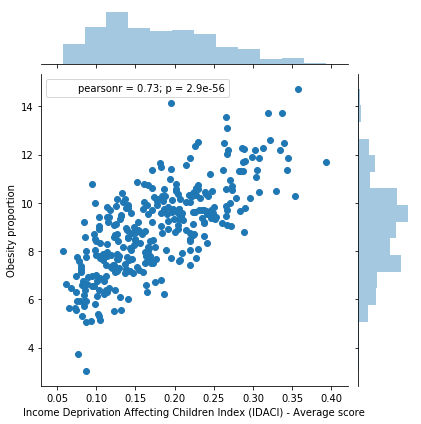

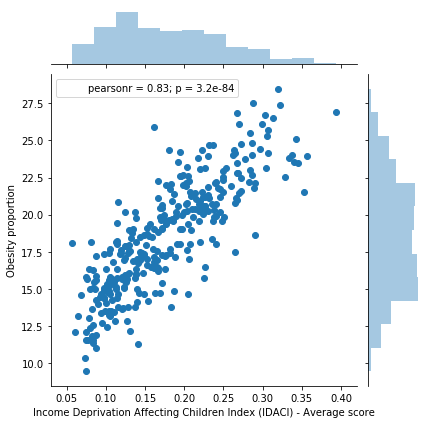

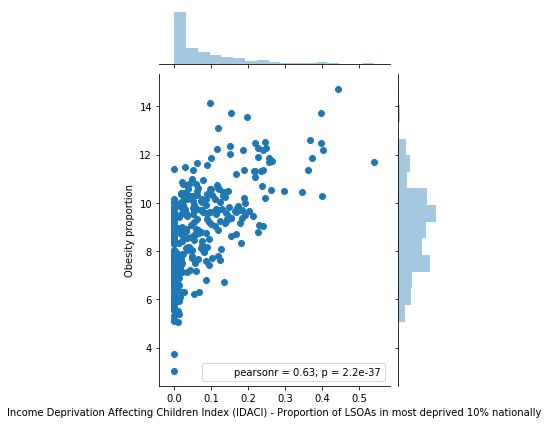

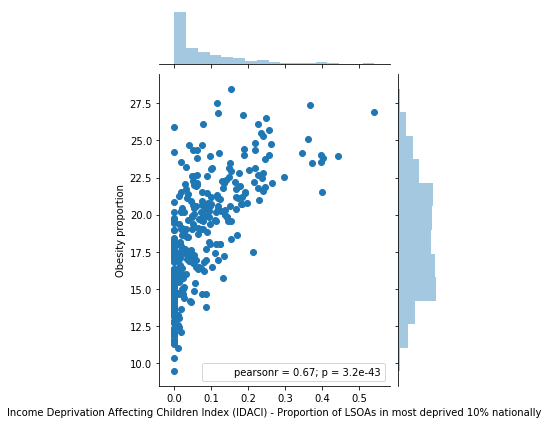

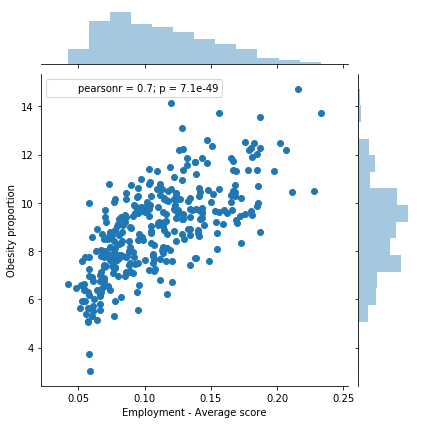

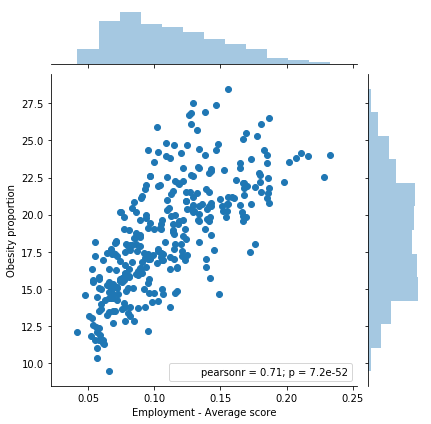

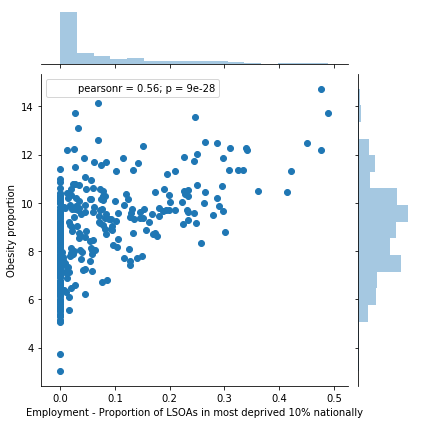

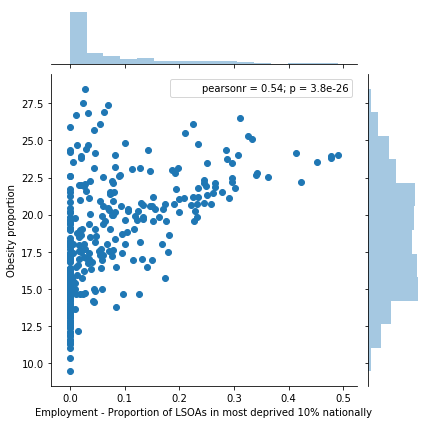

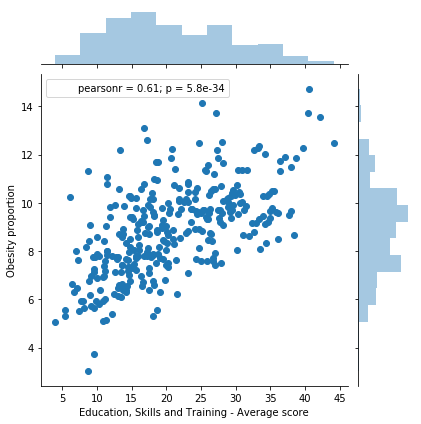

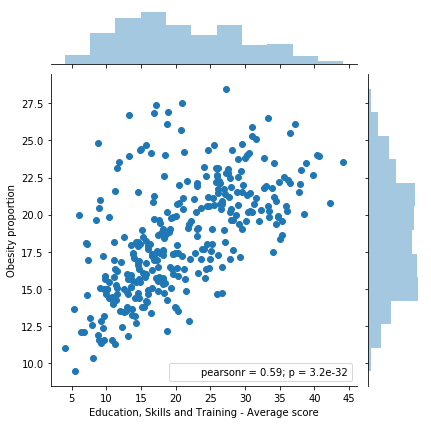

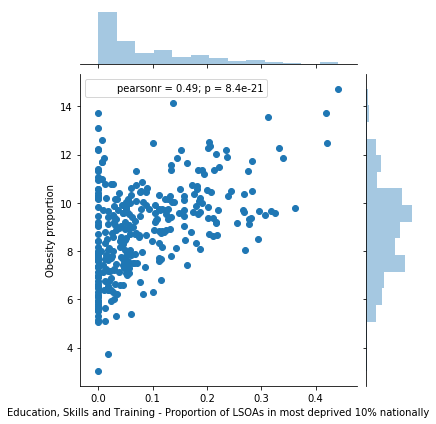

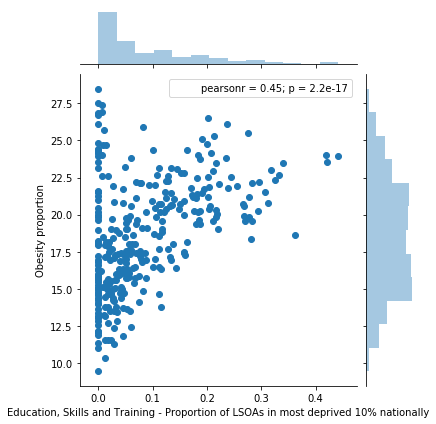

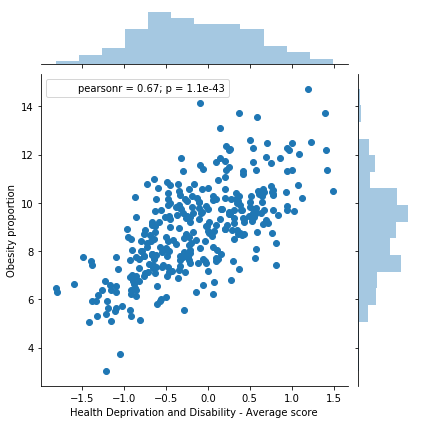

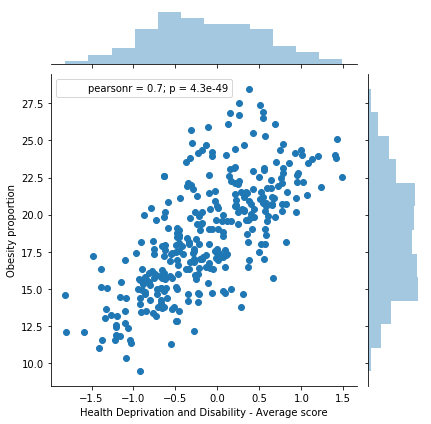

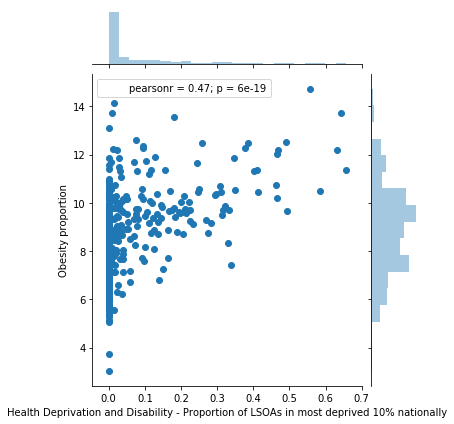

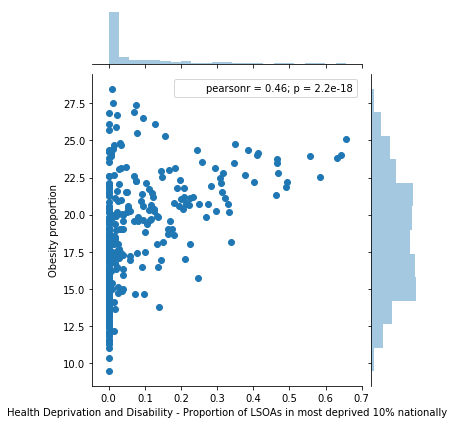

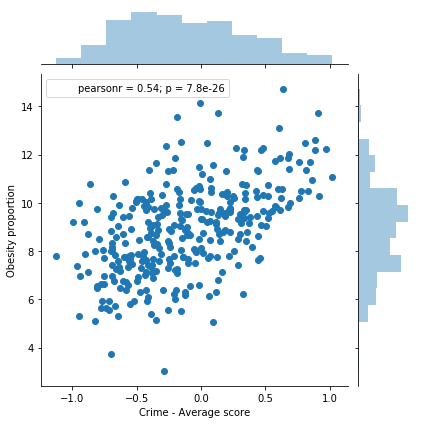

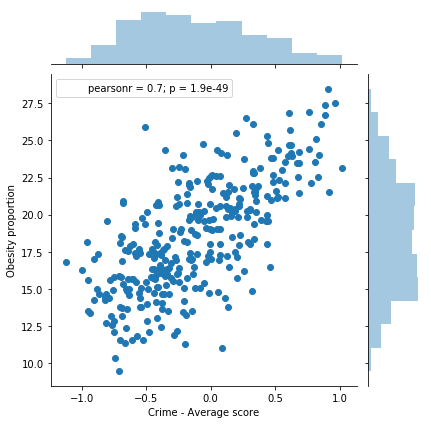

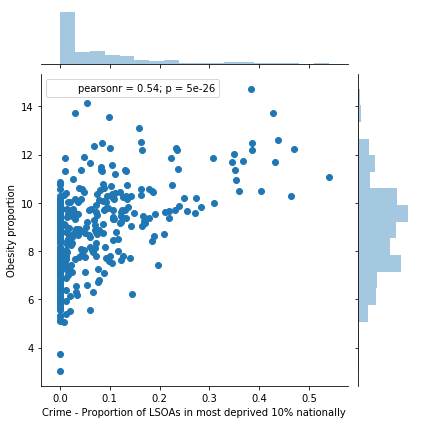

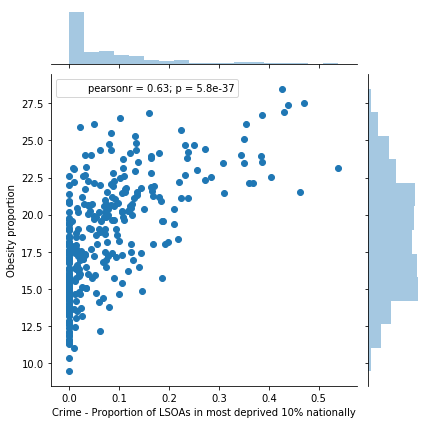

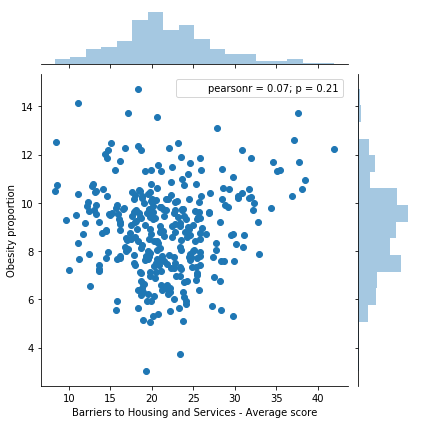

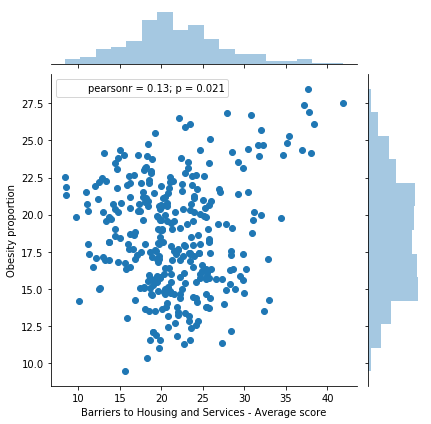

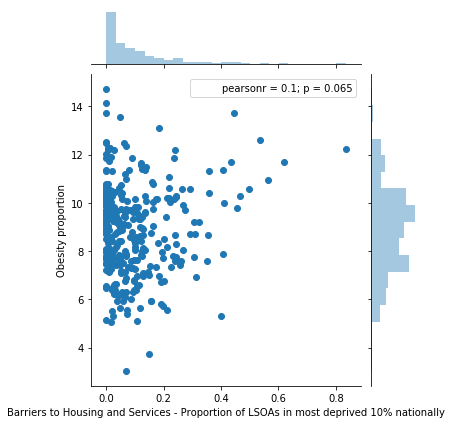

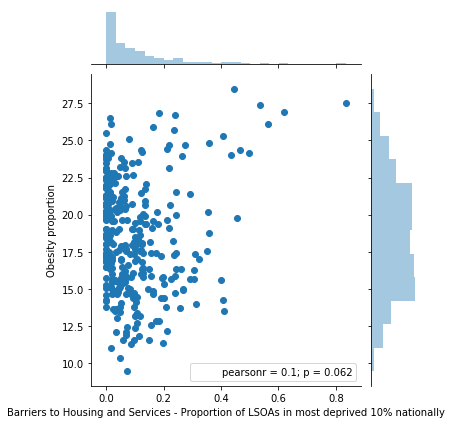

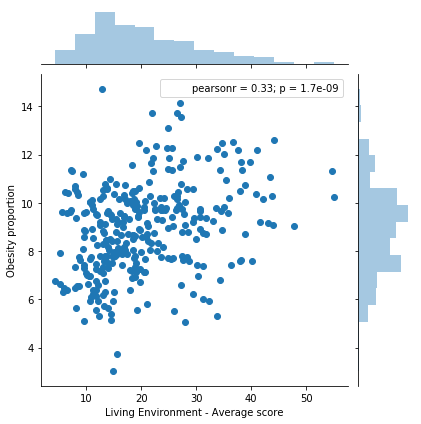

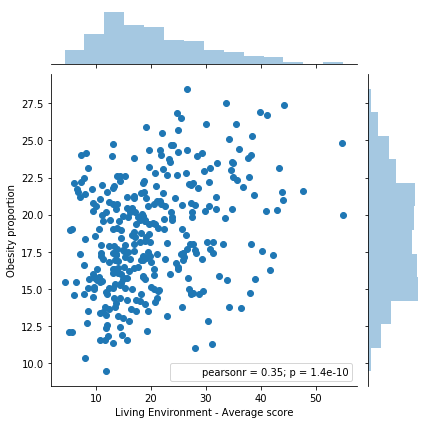

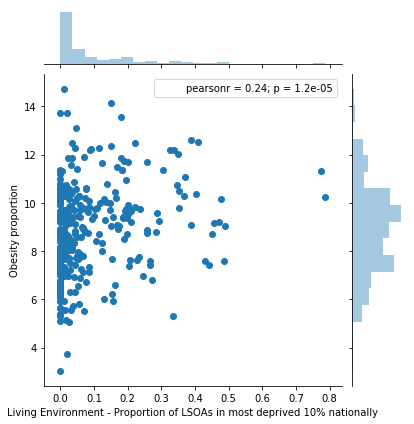

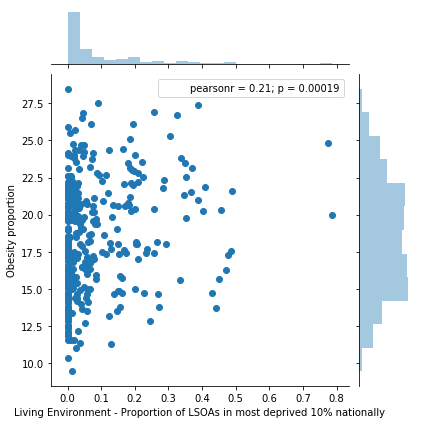

In [3]:
#inspect data visually (scatter plot) to understand what data to manage against variables of interest
#largely automate this as below. Can just do for df45 dataset as both df have same variables
for item in df45.head():
    if item not in ['Area Code', 'Region', 'Area Name','Obesity proportion']:
        sns.jointplot(x=item, y="Obesity proportion", data=df45)
        sns.jointplot(x=item, y="Obesity proportion", data=df1011)
plt.show()

### Data Management decisions code

Check length. Correct if equal 324: 324
Visual check that correct entries dropped:
    Area Code         Region   Area Name  Obesity proportion  \
49  E06000051  West Midlands  Shropshire            7.770801   
50  E06000052     South West    Cornwall           10.154565   

    IMD - Average score  \
49               16.689   
50               23.833   

    IMD - Proportion of LSOAs in most deprived 10% nationally   GDHI  \
49                                             0.0052          18705   
50                                             0.0521          17003   

    Income - Average score  \
49                   0.106   
50                   0.143   

    Income - Proportion of LSOAs in most deprived 10% nationally  \
49                                             0.0104              
50                                             0.0368              

    Income Deprivation Affecting Children Index (IDACI) - Average score  \
49                                              0.128 

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


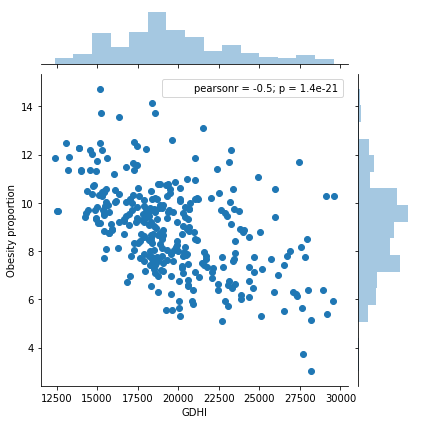

In [4]:
# Decision 1: remove Scilly Isles (index 51) and City of London data (index 293)
df45 = df45.drop([51,293],axis=0)
print("Check length. Correct if equal 324:", len(df45))
print("Visual check that correct entries dropped:")
print(df45[49:51])
print(df45[291:293])
# repeat for 10-12-year old dataset
df1011 = df1011.drop([51,293],axis=0)

# Decision 2: drop all 'LSOA' variables
drop_list = []
for item in df45.head(0):
    if 'LSOAs' in item:
        drop_list.append(item)
df45 = df45.drop(drop_list,axis=1)
df1011 = df1011.drop(drop_list,axis=1)

# Decision 3: check GDHI correlation by removing outliers (e.g. above £30000)
df45_filter = df45[df45['GDHI']<30000]
sns.jointplot(x="GDHI", y="Obesity proportion", data=df45_filter)

# Decision 4: combine df45 and df1011 datasets into a new dataframe
# need to rename obesity variables in df45 and df1011, as same name in both currently
df45 = df45.rename(columns={'Obesity proportion': 'Obesity 45'})
df1011 = df1011.rename(columns={'Obesity proportion': 'Obesity 1011'})
# give new dataframe a different name (so old one could be used again if required)
df_week03 = df45.copy(deep=True)
# add df1011's obesity variable to df_week03. (Add at column 4)
df_week03.insert(4, 'Obesity 1011', df1011['Obesity 1011'])

# Frequency tables and description for 3 variables is done in week 2 code

### for fun/checking, create a violin plot

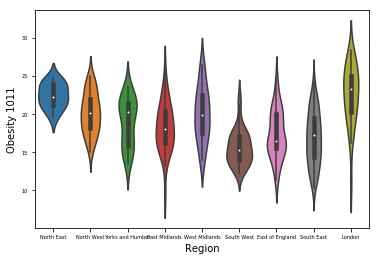

In [5]:
ax = sns.violinplot(x="Region", y="Obesity 1011",data=df_week03)
# ax = sns.violinplot(x="Region", y="IMD - Average score", data=df45)
# ax = sns.violinplot(x="Region", y="GDHI", data=df45)
ax.tick_params(labelsize=5)
plt.show()

## Course One Week Four
Requirement is to: STEP 1: Create graphs of your variables one at a time (univariate graphs). Examine both their center and spread. STEP 2: Create a graph showing the association between your explanatory and response variables (bivariate graph). Will largely automate this.

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


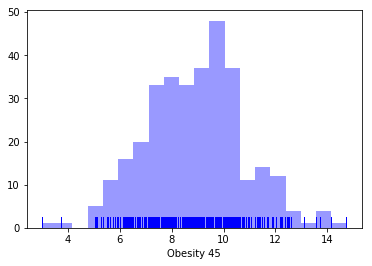

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


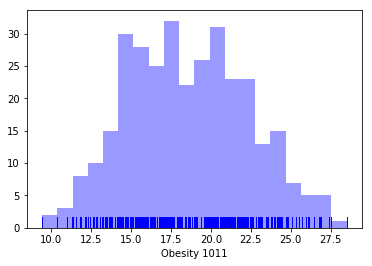

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


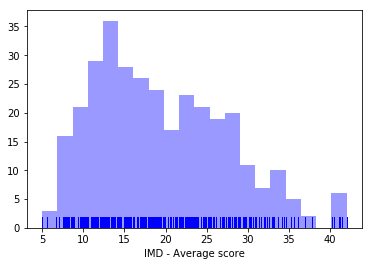

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


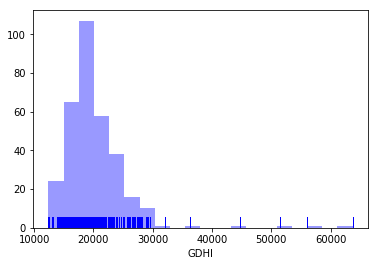

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


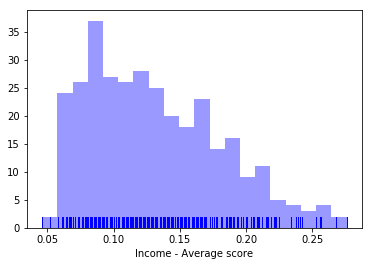

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


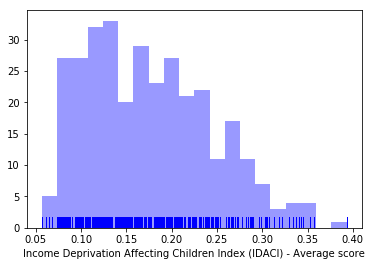

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


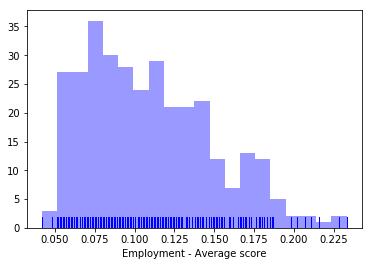

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


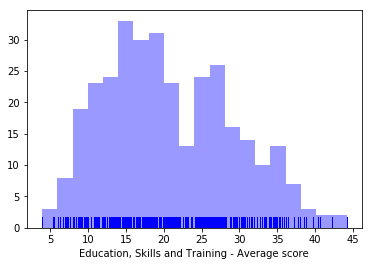

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


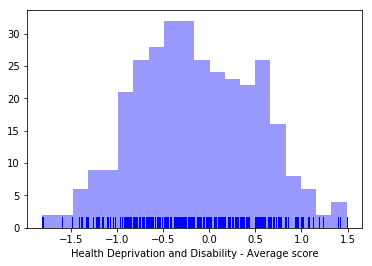

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


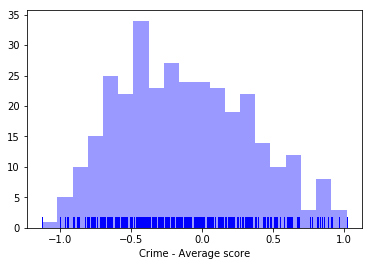

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


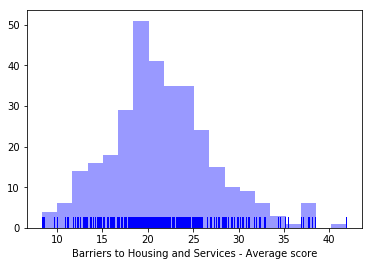

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


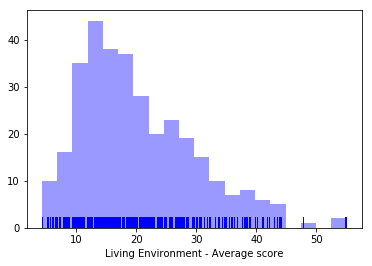

In [6]:
# the code below automatically generates all the wanted univariate plots at once
# use distplot; don't use ['Area Code', 'Region', 'Area Name'] as these are not the explanatory variables
for item in df_week03.head():
    if item not in ['Area Code', 'Region', 'Area Name']:
        sns.distplot(df_week03[item], bins = 20, kde=False, rug=True, color = "Blue")
        plt.show()
    

#### STEP 1 another approach: show univariate graph by region in this case
Here used the lovely violin plots

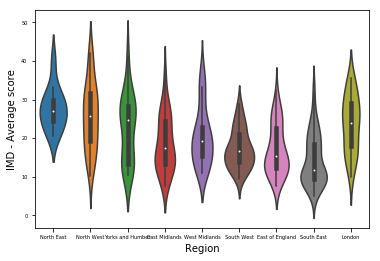

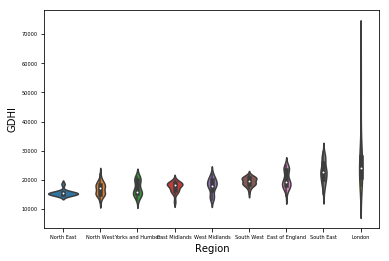

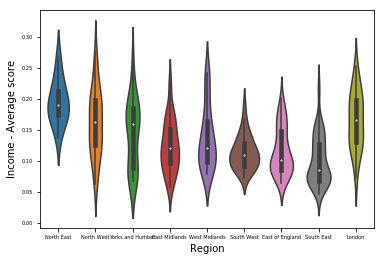

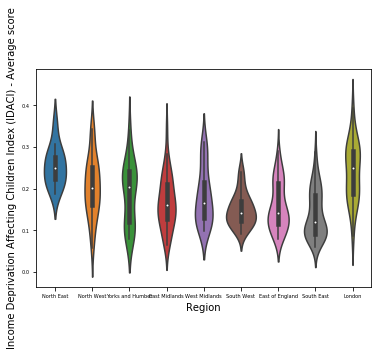

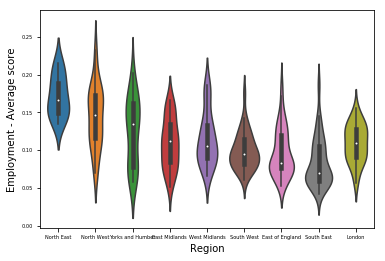

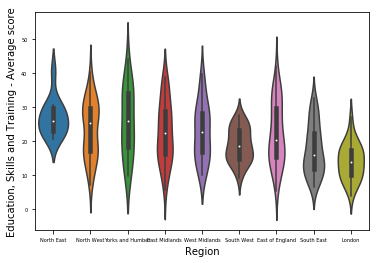

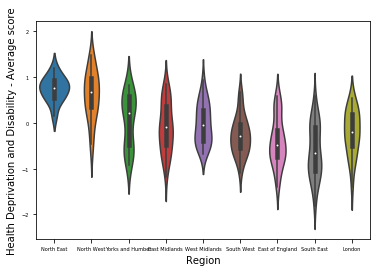

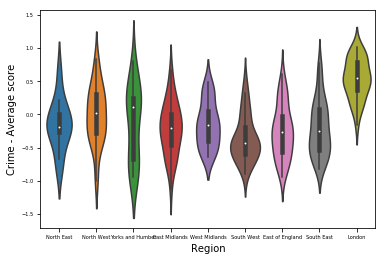

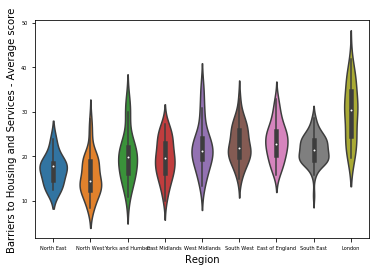

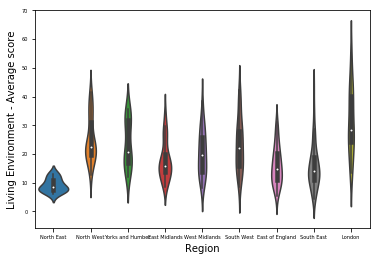

In [7]:
for item in df_week03.head():
    if item not in ['Area Code', 'Region', 'Area Name', 'Obesity 45', 'Obesity 1011']:
        ax = sns.violinplot(x="Region", y=item, data=df_week03)
        ax.tick_params(labelsize=5)
        plt.show() 

#### STEP 2: Create a graph showing the association between your explanatory and response variables (bivariate graph).

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/pyth

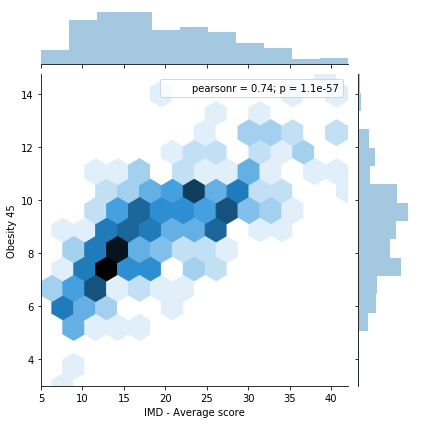

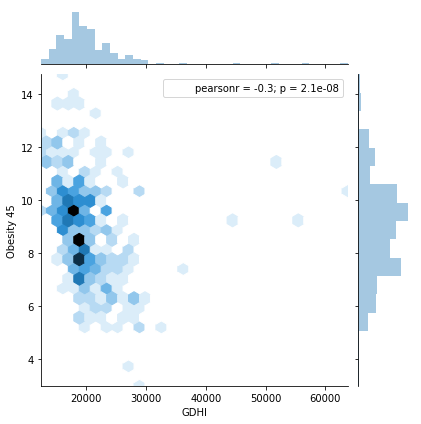

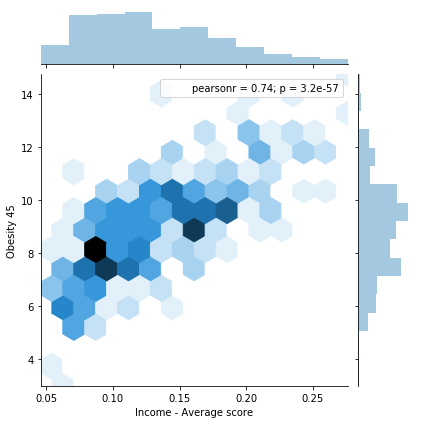

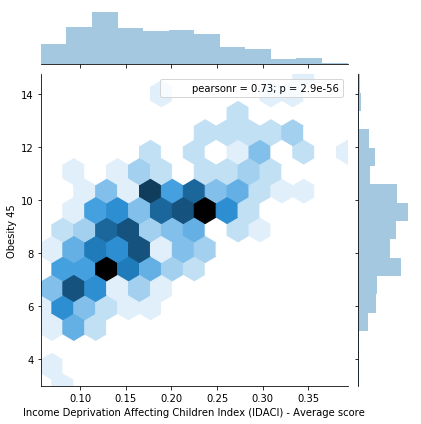

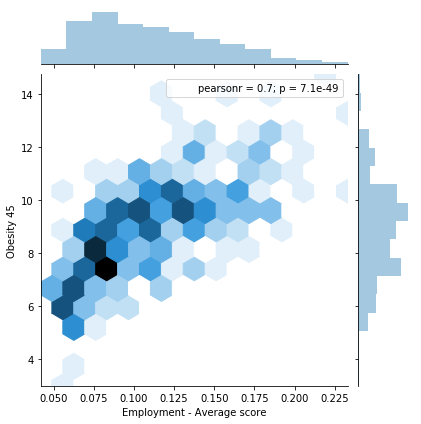

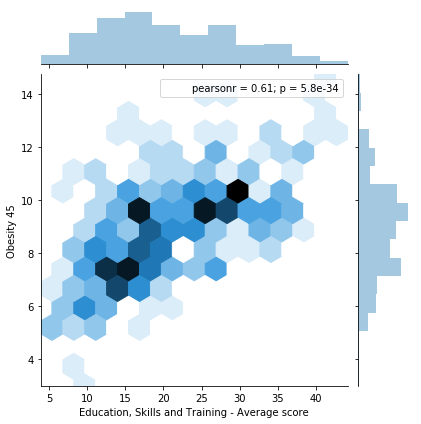

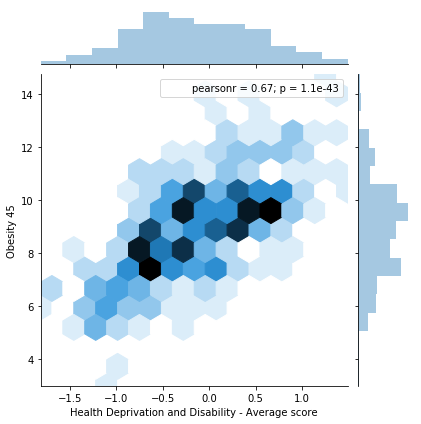

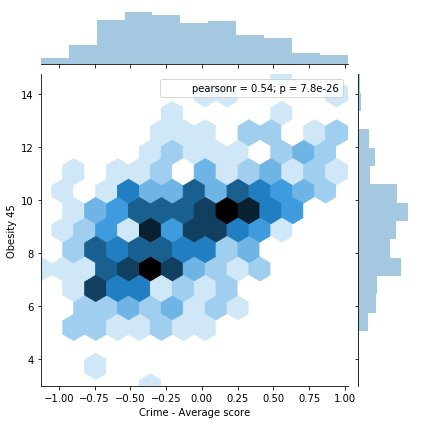

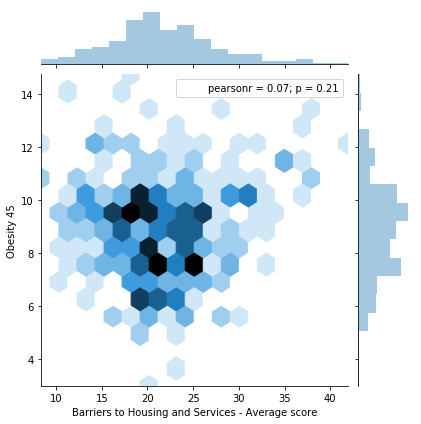

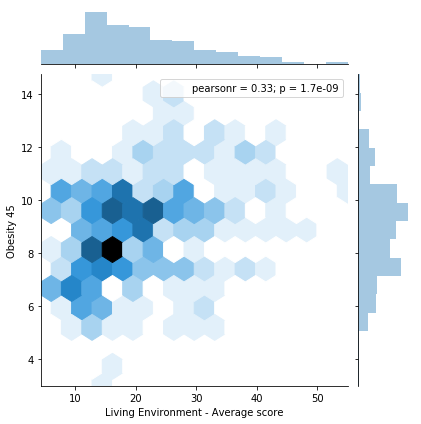

In [8]:
# the code below automatically generates all the wanted bvariate plots at once
# use jointplot; don't use ['Area Code', 'Region', 'Area Name']. 
#'Obesity 45', 'Obesity 1011' are  y variables, other items in df_week03.head() are the x variables
for item in df_week03.head():
    if item not in ['Area Code', 'Region', 'Area Name', 'Obesity 45', 'Obesity 1011']:
        sns.jointplot(item, "Obesity 45", data=df_week03, kind='hex')

# Course Two Week One

### Looking at crime versus income
ANOVA tests for Income deprivation versus Crime deprivation.<br> 
First, let's inspect data with a simple scatter plot

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


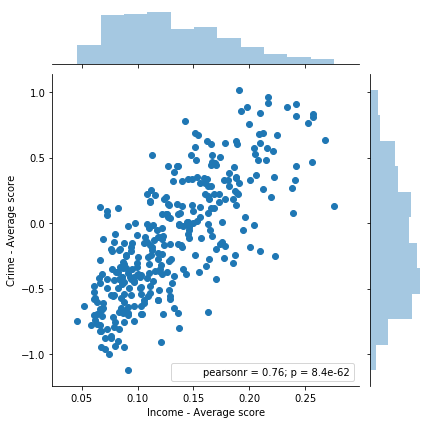

In [9]:
sns.jointplot("Income - Average score", "Crime - Average score", data=df_week03)
plt.show()

This week's assignment is to do ANOVA testing, used for categoric and quantitative variable data analysis.<br>
In this case, I have to make Income deprivation become categoric. Let's imagine we only know responses as 'Low', 'Medium' or 'High'

In [10]:
# want to ›do ANOVA test for 'Income - Average score' vs. 'Crime = Average score'
# import statistical libraries
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
# Have to force 'Income - Average score' to be categoric, e.g. 'Low', 'Medium', 'High' 
category_list = ['Low', 'Medium', 'High']
# use pd.cut to attribute the Income values into 3 'bins' (i.e. cut Income into 3 equally-spaced intervals)
df_week03['Income_Deprivation'] = pd.cut(df_week03['Income - Average score'], len(category_list), right=True, 
                         labels=category_list, retbins=False, precision=3, include_lowest=True)

Let's look at violin plots to see variability in each income deprivation category

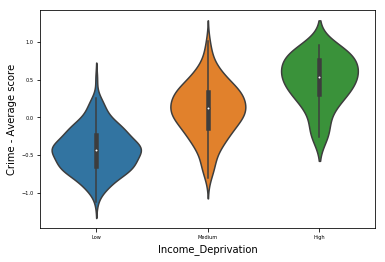

In [11]:
ax = sns.violinplot(x='Income_Deprivation', y="Crime - Average score", data=df_week03)
ax.tick_params(labelsize=5)
plt.show() 

Look at box plots also

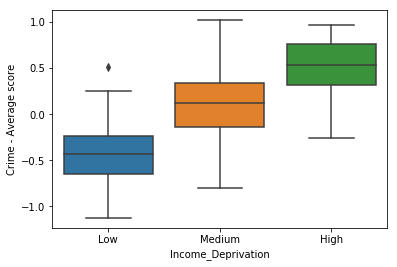

In [12]:
ax = sns.boxplot(x='Income_Deprivation', y="Crime - Average score", data=df_week03)
plt.show()

Do ANOVA testing, use code given in examples

In [13]:
# need to rename 'Crime - Average score' so no gaps in string
df_week03['Crime_Average_score'] = df_week03['Crime - Average score'] 
# using ols function for calculating the F-statistic and associated p value
model1 = smf.ols(formula='Crime_Average_score ~ C(Income_Deprivation)', data=df_week03)
results1 = model1.fit()
print (results1.summary())

                             OLS Regression Results                            
Dep. Variable:     Crime_Average_score   R-squared:                       0.507
Model:                             OLS   Adj. R-squared:                  0.504
Method:                  Least Squares   F-statistic:                     165.2
Date:                 Sun, 22 Jul 2018   Prob (F-statistic):           4.58e-50
Time:                         16:04:31   Log-Likelihood:                -92.524
No. Observations:                  324   AIC:                             191.0
Df Residuals:                      321   BIC:                             202.4
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


I.e. with an F-statistic of 165.2 and Prob of 4.56e-50 (close to zero), we  can reject the null hypothesis that all category means are the same.<br>
Let's look at some of the statistics:

In [14]:
print ('means for Crime_Average_score by Income_Deprivation')
m1= df_week03['Crime_Average_score'].groupby(df_week03['Income_Deprivation']).mean()
print (m1)

means for Crime_Average_score by Income_Deprivation
Income_Deprivation
Low      -0.426710
Medium    0.099468
High      0.487083
Name: Crime_Average_score, dtype: float64


In [15]:
print ('standard deviations for Crime_Average_score by Income_Deprivation')
sd1= df_week03['Crime_Average_score'].groupby(df_week03['Income_Deprivation']).std()
print (sd1)

standard deviations for Crime_Average_score by Income_Deprivation
Income_Deprivation
Low       0.292752
Medium    0.357192
High      0.331053
Name: Crime_Average_score, dtype: float64


Now wish to do a Tukey Honest Significant Difference Test to check pair-wise ANOVA comparisons for the Income deprivation categories:

In [16]:
mc1 =  multi.MultiComparison(df_week03['Crime_Average_score'], df_week03['Income_Deprivation'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 High   Low   -0.9138  -1.0541 -0.7735  True 
 High  Medium -0.3876  -0.5316 -0.2437  True 
 Low   Medium  0.5262   0.4357  0.6166  True 
---------------------------------------------


One can see above that we can reject even that the mean of each category is the same.
This is no surprise having looked at both the violin plots and box plots

# Course Two Week Two

Course Two Week Two has its own Jupyter notebook: <br>
http://localhost:8888/notebooks/Documents/GitHub/WesleyanDataMOOC/W_J_Course02Week02.ipynb<br>
This is because the categorical-to-categorical data testing using chi-square test of independence. For that I used British Social Attitudes Survey data.

# Course Two Week Three

### Task Generate a correlation coefficient.

In Course One Week Three, I generated correlation coefficients for a large set of proposed explanatory variables against the dependent variable of prevalence of childhood obesity in England in 2015.

That used the seaborn jointplot command. For this week's assignment I will only create one correlation scatter plot and associated Pearson correlation coefficient, and use seaborn's regplot. (There is no data cleaning, e.g. dropna, required as all data is clean without ommissions.

Text(0.5,1,'Scatterplot for the association between Income Deprivation and Childhood Obesity')

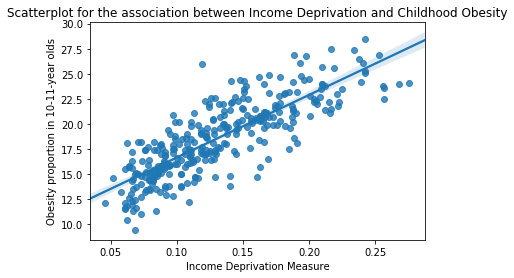

In [17]:
scat1 = sns.regplot(x="Income - Average score", y="Obesity 1011", fit_reg=True, data=df_week03)
plt.xlabel('Income Deprivation Measure')
plt.ylabel('Obesity proportion in 10-11-year olds')
plt.title('Scatterplot for the association between Income Deprivation and Childhood Obesity')

In [18]:
print ('Association between Income Deprivation and Childhood Obesity in England for 10-11-year olds')
print (scipy.stats.pearsonr(df_week03['Income - Average score'], df_week03['Obesity 1011']))

Association between Income Deprivation and Childhood Obesity in England for 10-11-year olds
(0.8214633536393005, 1.5425550555181338e-80)


As one can see there is a strong association between Income Deprivation and Childhood Obesity in England for 10-11-year olds, with a Pearson correlation coefficient of 0.82. <br><br>(0.82)^2 = 0.672, allowing us to claim we can say 67% of the variation in obesity proportion for 10-11-year olds in an English local authority area is explained by the Income Deprivation as measured by 'Income - Average score'.

For policy-makers, this gives useful insight into where to look to tackle the societal problem of childhood obesity.  It is not that the children of those in income poverty consume too few calories; poor quality, cheap already-prepared food is often high in calories (junk food). So lifestyle factors of those in income poverty is a factor.

Importantly, income poverty is not the same as low income!  The 'Income - Average score' basically measures the proportion of people in an area on welfare payments, in receipt of particular tax credits, or who asylum seekers on such support. (Details at: https://bit.ly/2KzxYLi)

The following Python code gives correlation coefficient for average income per head in an area ('GDHI') and childhood obesity. You will see, below, that the Pearson correlation here is relatively weak at -0.23.  So it seems to be lifestyle decisions/actions (whether voluntary or not) of those on social welfare support rather than being poor, per se, that is strongly associated with childhood obesity.

In [19]:
print ('Association between GDHI and Childhood Obesity in England for 10-11-year olds')
print (scipy.stats.pearsonr(df_week03['GDHI'], df_week03['Obesity 1011']))

Association between GDHI and Childhood Obesity in England for 10-11-year olds
(-0.23154036753777757, 2.565562328366926e-05)


# Course Two Week Four

Run ANOVA, Chi-Square Test or correlation coefficient that includes a moderator.<br><br>
Technique is to i). make a new categorical variable of the moderating variable; ii). create a whole dataframe for each of theses individual categories only.


In [20]:
# import needed libraries
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# Have to force 'Health Deprivation and Disability - Average score' to be categoric, 
# e.g. 'Low', 'Medium', 'High'
category_list = ['Low', 'Low-Medium', 'Medium-High','High']

# use pd.cut to attribute the Health Deprivation values into 'bins' 
# according to the category list. Use new variable Health_Cat
df_week03['Health_Cat'] = pd.cut(df_week03['Health Deprivation and Disability - Average score'], len(category_list), right=True,
                         labels=category_list, retbins=False, precision=3, include_lowest=True)


In [21]:
# need to create sub dataframes for each Health_Cat
sub_LowHealth=df_week03[(df_week03['Health_Cat']=='Low')]
sub_LowMedHealth=df_week03[(df_week03['Health_Cat']=='Low-Medium')]
sub_MedHigHealth=df_week03[(df_week03['Health_Cat']=='Medium-High')]
sub_HigHealth=df_week03[(df_week03['Health_Cat']=='High')]

Draw scatter plots

Association between childhood obesity and Income deprivation for those
in Low Health_Cat
(0.33996827476115477, 0.07671414924101914)

AxesSubplot(0.125,0.125;0.775x0.755)


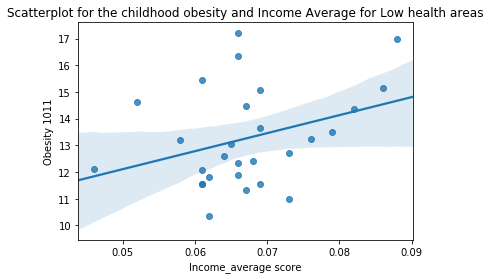

In [22]:
print ('Association between childhood obesity and Income deprivation for those\nin Low Health_Cat')
print (scipy.stats.pearsonr(sub_LowHealth['Obesity 1011'], sub_LowHealth['Income - Average score']))
print()
scat0 = sns.regplot(x="Income - Average score", y="Obesity 1011", data=sub_LowHealth)
plt.xlabel('Income_average score')
plt.ylabel('Obesity 1011')
plt.title('Scatterplot for the childhood obesity and Income Average for Low health areas')
print(scat0)

Association between childhood obesity and Income deprivation for those
in Low-Med Health_Cat
(0.7217640420232134, 1.196922527378305e-23)

AxesSubplot(0.125,0.125;0.775x0.755)


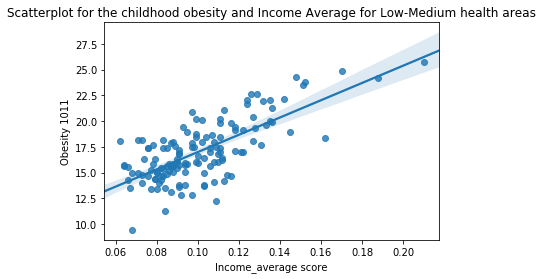

In [23]:
print ('Association between childhood obesity and Income deprivation for those\nin Low-Med Health_Cat')
print (scipy.stats.pearsonr(sub_LowMedHealth['Obesity 1011'], sub_LowMedHealth['Income - Average score']))
print()
scat1 = sns.regplot(x="Income - Average score", y="Obesity 1011", data=sub_LowMedHealth)
plt.xlabel('Income_average score')
plt.ylabel('Obesity 1011')
plt.title('Scatterplot for the childhood obesity and Income Average for Low-Medium health areas')
print(scat1)

Association between childhood obesity and Income deprivation for those
in Medium-High Health_Cat
(0.696910220977494, 6.832021395622134e-19)

AxesSubplot(0.125,0.125;0.775x0.755)


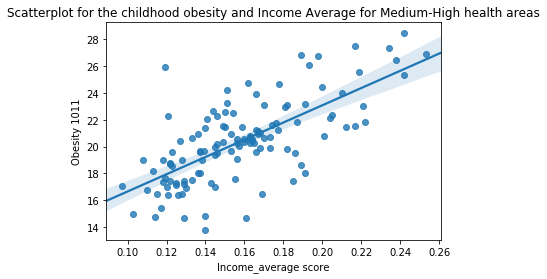

In [24]:
print ('Association between childhood obesity and Income deprivation for those\nin Medium-High Health_Cat')
print (scipy.stats.pearsonr(sub_MedHigHealth['Obesity 1011'], sub_MedHigHealth['Income - Average score']))
print()
scat2 = sns.regplot(x="Income - Average score", y="Obesity 1011", data=sub_MedHigHealth)
plt.xlabel('Income_average score')
plt.ylabel('Obesity 1011')
plt.title('Scatterplot for the childhood obesity and Income Average for Medium-High health areas')
print(scat2)

Association between childhood obesity and Income deprivation for those
in High Health_Cat
(0.5482284138827191, 0.0005372268683685304)

AxesSubplot(0.125,0.125;0.775x0.755)


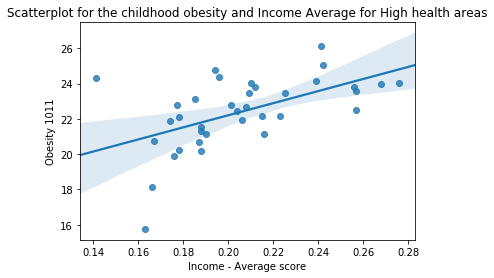

In [25]:
print ('Association between childhood obesity and Income deprivation for those\nin High Health_Cat')
print (scipy.stats.pearsonr(sub_HigHealth['Obesity 1011'], sub_HigHealth['Income - Average score']))
print()
scat3 = sns.regplot(x="Income - Average score", y="Obesity 1011", data=sub_HigHealth)
plt.xlabel('Income - Average score')
plt.ylabel('Obesity 1011')
plt.title('Scatterplot for the childhood obesity and Income Average for High health areas')
print(scat3)

By comparison, what is the comparison with the correlation coefficient between childhood obesity and Income deprivation across all categories of the Health Deprivation and Disability?

Association between childhood obesity and Income deprivation for global population
(0.8214633536393005, 1.5425550555181338e-80)

AxesSubplot(0.125,0.125;0.775x0.755)


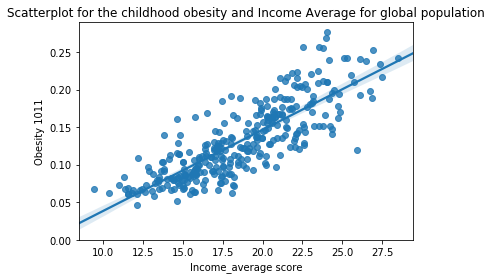

In [26]:
print ('Association between childhood obesity and Income deprivation for global population')
print (scipy.stats.pearsonr(df_week03['Obesity 1011'], df_week03['Income - Average score']))
print()
scat4 = sns.regplot(x="Obesity 1011", y="Income - Average score", data=df_week03)
plt.xlabel('Income_average score')
plt.ylabel('Obesity 1011')
plt.title('Scatterplot for the childhood obesity and Income Average for global population')
print(scat4)

# Course Three Week Two

## Test a basic linear regression model for the association between your primary explanatory variable and a response variable.

1. If you have a quantitative explanatory variable, center it so that the mean = 0 (or really close to 0) by subtracting the mean, and then calculate the mean to check your centering. <br>
2. Test a linear regression model and summarize the results in a couple of sentences. Make sure to include statistical results (regression coefficients and p-values) in your summary.

In [27]:
# import additional required libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
# centre explanatory variable and check mean ~= 0 and sum ~= 0
df_week03['ExplanVar01'] = df_week03['Income - Average score'] - df_week03['Income - Average score'].mean()
print(df_week03['ExplanVar01'].mean())
print(df_week03['ExplanVar01'].sum())
print(df_week03['Income - Average score'].mean())

-6.382069084457883e-17
-2.0872192862952943e-14
0.13105555555555562


In [29]:
# For the smf module, need to remove spaces in name of response variable
df_week03['Obesity_1011'] = df_week03['Obesity 1011']

In [30]:
# create linear regression between explanatory variable and response variable
print ("OLS regression model for the association between Income deprivation and childhood obesity in 10-11-year olds")
reg1 = smf.ols('Obesity_1011 ~ ExplanVar01', data=df_week03).fit()
print (reg1.summary())

OLS regression model for the association between Income deprivation and childhood obesity in 10-11-year olds
                            OLS Regression Results                            
Dep. Variable:           Obesity_1011   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     668.2
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.54e-80
Time:                        16:04:39   Log-Likelihood:                -706.02
No. Observations:                 324   AIC:                             1416.
Df Residuals:                     322   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Now draw scatter plot of this situation.

AxesSubplot(0.125,0.125;0.775x0.755)


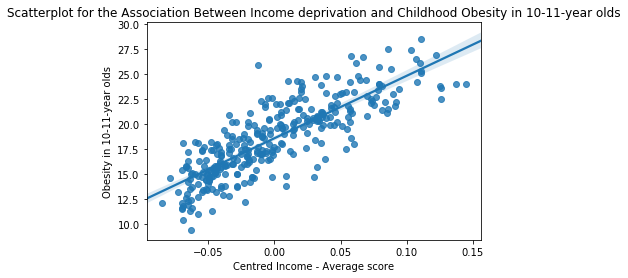

In [31]:
scat1 = sns.regplot(x="ExplanVar01", y="Obesity_1011", scatter=True, data=df_week03)
plt.xlabel('Centred Income - Average score')
plt.ylabel('Obesity in 10-11-year olds')
plt.title ('Scatterplot for the Association Between Income deprivation and Childhood Obesity in 10-11-year olds')
print(scat1)

Note that '0' on the x-axis is not on the left. If you go vertically from 0 on the x-axis, you hit the regression line at 18.567 according to the table summary, and visually this seems confirmed.  Having centred the explanatory variable, the 'intercept' in the table (18.567) is simply the mean of the response variable at the mean value of the predictor variables.

## Analysis and commentary

The R-squared coefficient is 0.675, meaning 67.5% of the variance of the response variable is associated with variance in the explanatory variable.

The F-statistic is 668.2 and the the associated p-value is <0.001, meaning we can reject a null hypothesis of no association between the explanantory variable and response variable.

The explanatory variable coefficient is 62.45, meaning that a 0.1 (10%) increase in the explanatory coefficient leads to a 6.245% (= 0.1 * 62.45) increase in the proportion of obesity in 10-11-year olds.  The p-value associated with this is <0.001, which is significant and we can say Income deprivation is significantly and positively associated with childhood obesity. 

# Course Three Week Three

## Test a multiple regression model

Task: Write a blog entry that summarizes in a few sentences 1) what you found in your multiple regression analysis. Discuss the results for the associations between all of your explanatory variables and your response variable. Make sure to include statistical results (Beta coefficients and p-values) in your summary. 2) Report whether your results supported your hypothesis for the association between your primary explanatory variable and the response variable. 3) Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable.

All the explanatory variables in the working dataframe are quantitative and data is cleaned up.  Initial task is to create a bespoke dataframe just of the explanatory variables, to later do a check of correlation between theses variables, to try to minimise multicollinearity.

In [32]:
# create dataframe of just the potential explanatory variables
df_ex_vars = df_week03.loc[:,'IMD - Average score': "Living Environment - Average score"]
print(df_ex_vars.head(1))


   IMD - Average score   GDHI  Income - Average score  \
0               33.178  15410                   0.239   

   Income Deprivation Affecting Children Index (IDACI) - Average score  \
0                                              0.307                     

   Employment - Average score  Education, Skills and Training - Average score  \
0                       0.211                                           30.51   

   Health Deprivation and Disability - Average score  Crime - Average score  \
0                                              0.929                  0.078   

   Barriers to Housing and Services - Average score  \
0                                            13.128   

   Living Environment - Average score  
0                                8.26  


Next task is to do a pairwise correlation across all columns of potential explanatory variables as there are so many, and strong likelihood of multicollinearity.  This uses the dataframes.corr() command.

In [33]:
print(df_ex_vars.corr())

                                                    IMD - Average score  \
IMD - Average score                                            1.000000   
GDHI                                                          -0.356593   
Income - Average score                                         0.977732   
Income Deprivation Affecting Children Index (ID...             0.952685   
Employment - Average score                                     0.937797   
Education, Skills and Training - Average score                 0.766627   
Health Deprivation and Disability - Average score              0.906302   
Crime - Average score                                          0.733788   
Barriers to Housing and Services - Average score              -0.010302   
Living Environment - Average score                             0.529679   

                                                        GDHI  \
IMD - Average score                                -0.356593   
GDHI                                          

The above matrix table shows that many of the explanatory variables are highly correlated with 'IMD - Average score'. This is unsurprising as IMD is a weighted index of all the measures of social deprivation excepting the 'Income Deprivation Affecting Children Index' (IDACI). So I will not use this aggregated explanatory variable.

The variables that showed the highest correlation with each other were Income, IDACI, Employment and Health.  For any pairs of these the correlaton coefficient was over 0.90.  So for all of these highly correlated explanatory variables I shall, initially at least, only use the single 'IDACI - Average score' variable in the correlation, as it specifically measures income deprivation that impacts children - and this study is about childhood obesity.  

So the explanatory variables to be used are: <br>
>Income Deprivation Affecting Children Index (IDACI) - Average score<br>
>Education, Skills and Training - Average score<br>
>Crime - Average score<br> 
Barriers to Housing and Services - Average score<br>
Living Environment - Average score

    

The next task for the multiple regression is to create additional columns for the original dataframe that centre each explanatory variable.

In [34]:
# list of explanantory variables
exp_vars = ['Income Deprivation Affecting Children Index (IDACI) - Average score', 'Education, Skills and Training - Average score', 'Crime - Average score', 'Barriers to Housing and Services - Average score', 'Living Environment - Average score']

In [35]:
print(exp_vars)

['Income Deprivation Affecting Children Index (IDACI) - Average score', 'Education, Skills and Training - Average score', 'Crime - Average score', 'Barriers to Housing and Services - Average score', 'Living Environment - Average score']


To make things slightly complex, the smf stats module for regression does not accept spaces in string. So the name of the explanatory variables has to be modified.

In [36]:
print(df_week03.head(1))

   Area Code      Region   Area Name  Obesity 45  Obesity 1011  \
0  E06000001  North East  Hartlepool   10.450297     24.170616   

   IMD - Average score   GDHI  Income - Average score  \
0               33.178  15410                   0.239   

   Income Deprivation Affecting Children Index (IDACI) - Average score  \
0                                              0.307                     

   Employment - Average score  Education, Skills and Training - Average score  \
0                       0.211                                           30.51   

   Health Deprivation and Disability - Average score  Crime - Average score  \
0                                              0.929                  0.078   

   Barriers to Housing and Services - Average score  \
0                                            13.128   

   Living Environment - Average score Income_Deprivation  Crime_Average_score  \
0                                8.26               High                0.078   

  Healt

In [37]:
for var in exp_vars:
    df_week03[var.replace(" ", "").replace("-","") +'_c'] = df_week03[var] - df_week03[var].mean()

Also, need to remove commas

Equally, need to remove spaces in the string that names the dependent variables

In [38]:
df_week03['Obesity45'] = df_week03['Obesity 45']
df_week03['Obesity1011'] = df_week03['Obesity 1011']

Print head of relevant section of dataframe to check all worked ok.

In [39]:
print(df_week03.loc[:, : 'Obesity1011'].head(1))

   Area Code      Region   Area Name  Obesity 45  Obesity 1011  \
0  E06000001  North East  Hartlepool   10.450297     24.170616   

   IMD - Average score   GDHI  Income - Average score  \
0               33.178  15410                   0.239   

   Income Deprivation Affecting Children Index (IDACI) - Average score  \
0                                              0.307                     

   Employment - Average score     ...       Health_Cat  ExplanVar01  \
0                       0.211     ...             High     0.107944   

   Obesity_1011  IncomeDeprivationAffectingChildrenIndex(IDACI)Averagescore_c  \
0     24.170616                                           0.130648              

   Education,SkillsandTrainingAveragescore_c CrimeAveragescore_c  \
0                                   9.773321            0.198552   

   BarrierstoHousingandServicesAveragescore_c LivingEnvironmentAveragescore_c  \
0                                   -8.446262                      -12.029642  

Finally, before running the regression, check for one explanatory centred variable that centring worked. The mean of this variable should ~= 0

In [40]:
print(df_week03['LivingEnvironmentAveragescore_c'].mean())

-1.1973960917438725e-14


The result above confirms correct centring. Now add regression code, adding variables one-by-one. I have 2 dependent variables to choose from, Obesity45 and Obesity1011; I will use the latter. (Obesity45 has meaning: proportion of obese 4-5-year old children in an English local authorty area.)

In [41]:
# some manual tidying up of names
df_week03['IDACI_c'] = df_week03['IncomeDeprivationAffectingChildrenIndex(IDACI)Averagescore_c']
df_week03['EducationSkillsandTrainingAveragescore_c'] = df_week03['Education,SkillsandTrainingAveragescore_c']
# One explanatory variable only: 
reg1 = smf.ols('Obesity1011 ~ IDACI_c', data=df_week03).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     721.6
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.23e-84
Time:                        16:04:40   Log-Likelihood:                -697.50
No. Observations:                 324   AIC:                             1399.
Df Residuals:                     322   BIC:                             1407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5767      0.116    160.025      0.0

In [42]:
# Add 'EducationSkillsandTrainingAveragescore_c'
reg2 = smf.ols('Obesity1011 ~ IDACI_c + EducationSkillsandTrainingAveragescore_c', data=df_week03).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     360.7
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           7.93e-83
Time:                        16:04:40   Log-Likelihood:                -697.18
No. Observations:                 324   AIC:                             1400.
Df Residuals:                     321   BIC:                             1412.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Adding 'EducationSkillsandTrainingAveragescore_c' had negligable impact, so removed and 'CrimeAveragescore_c' used instead.


In [43]:
# Add 'CrimeAveragescore_c'
reg3 = smf.ols('Obesity1011 ~ IDACI_c + CrimeAveragescore_c', data=df_week03).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     364.5
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.50e-83
Time:                        16:04:40   Log-Likelihood:                -696.02
No. Observations:                 324   AIC:                             1398.
Df Residuals:                     321   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.5767    

Again, this variable had no impact, so using 'BarrierstoHousingandServicesAveragescore_c' instead.

In [44]:
# Add 'BarrierstoHousingandServicesAveragescore_c'
reg4 = smf.ols('Obesity1011 ~ IDACI_c + BarrierstoHousingandServicesAveragescore_c', data=df_week03).fit()
print (reg4.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     379.2
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.90e-85
Time:                        16:04:40   Log-Likelihood:                -691.52
No. Observations:                 324   AIC:                             1389.
Df Residuals:                     321   BIC:                             1400.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

This variable has made a small, non-negligable improvement and is still significant. So adding last of the initial planned explanantory variables.

In [45]:
# Add 'LivingEnvironmentAveragescore_c'
reg5 = smf.ols('Obesity1011 ~ IDACI_c + BarrierstoHousingandServicesAveragescore_c + LivingEnvironmentAveragescore_c', data=df_week03).fit()
print (reg5.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           7.25e-85
Time:                        16:04:40   Log-Likelihood:                -689.31
No. Observations:                 324   AIC:                             1387.
Df Residuals:                     320   BIC:                             1402.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

The 'LivingEnvironmentAveragescore_c' has marginally increased the R-squared of the model. You can see that the coefficient of this variable is is negative (-0.0292) and has a 95% confidence interbal below zero (-0.057 to -0.002), so it seems negatively correlated with childhood obesity.

So far the model has three explanatory variables ('IDACI_c','BarrierstoHousingandServicesAveragescore_c', 'LivingEnvironmentAveragescore_c') and a R-squared of 0.703, able to explain 70% of the variance of childhood obesity.  

Let's see what happens when I put in one of the variables assumed to cause high multi-collinearity!

In [46]:
# Add 'HealthDeprivationandDisabilityAveragescore_c', a centred variable
df_week03['HealthDeprivationandDisabilityAveragescore_c'] = df_week03['Health Deprivation and Disability - Average score'] - df_week03['Health Deprivation and Disability - Average score'].mean()

In [47]:
# run a regression
reg6 = smf.ols('Obesity1011 ~ IDACI_c + LivingEnvironmentAveragescore_c + HealthDeprivationandDisabilityAveragescore_c', data=df_week03).fit()
print (reg6.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     240.4
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.25e-81
Time:                        16:04:41   Log-Likelihood:                -696.87
No. Observations:                 324   AIC:                             1402.
Df Residuals:                     320   BIC:                             1417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

The health deprivation measure has decreased the R-squared of the model, from 0.707 to 0.693. You can see that the 95% confidence interval straddles zero (-0.494 to 0.786), so you cannot reject the null hypothesis it is not associated with childhood obesity. So we remove this variable. (Similar happened when adding a centred variable for Employment deprivation, but this is not shown.)

Further tasks: a) q-q plot, b) standardized residuals for all observations, c) leverage plot.

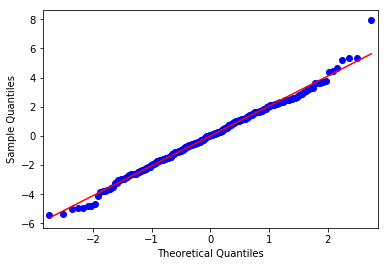

In [48]:
#Q-Q plot for normality
fig5i=sm.qqplot(reg5.resid, line='r')

Figure(432x288)


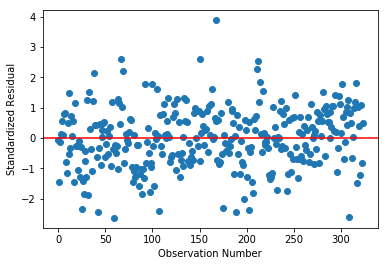

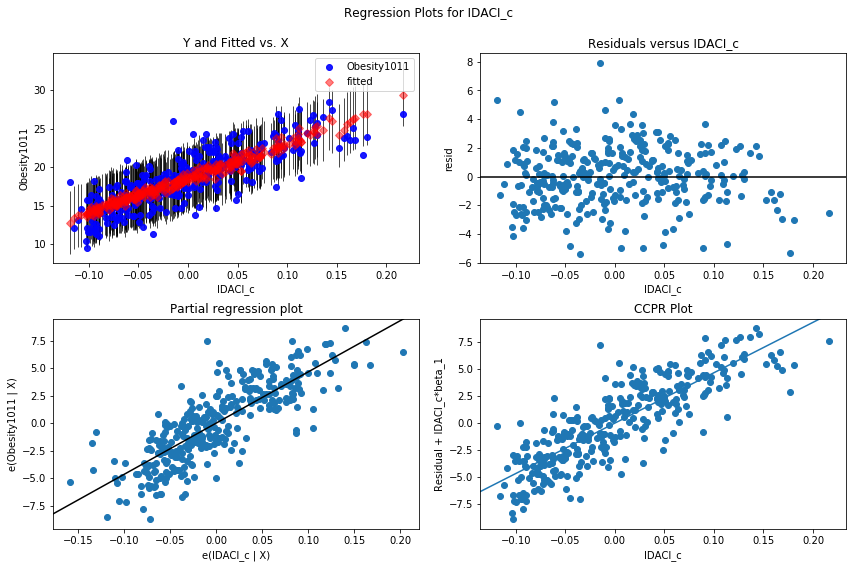

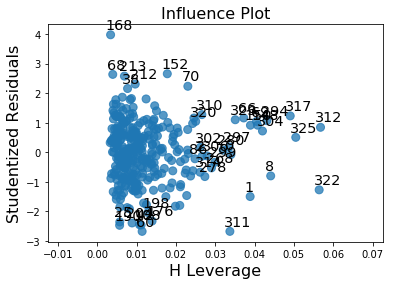

In [49]:
# simple plot of residuals
stdres=pd.DataFrame(reg5.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


# additional regression diagnostic plots
fig2 = plt.figure(figsize = (12,8))
fig2 = sm.graphics.plot_regress_exog(reg5,  "IDACI_c", fig=fig2)

# leverage plot
fig3=sm.graphics.influence_plot(reg5, size=8)
print(fig3)

My kind of "always wanted to do this" - level of social injustice, how far from the mean or median: a kind of twice-centred variable, say for income average score?  (The idea being that relative not absolute deprivation - measured by distance from the mean/median - is important.)
    

In [50]:
df_week03["IncomeAveragescore"] = df_week03["Income - Average score"] - df_week03["Income - Average score"].mean()


In [51]:
# run a regression
reg7 = smf.ols('Obesity1011 ~ IDACI_c', data=df_week03).fit()
print (reg7.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     721.6
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.23e-84
Time:                        16:04:44   Log-Likelihood:                -697.50
No. Observations:                 324   AIC:                             1399.
Df Residuals:                     322   BIC:                             1407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5767      0.116    160.025      0.0

Both for median-centring (not shown) and mean-centring, model is not improved.  Now just try with a quadratic term to see if performance is improved at either end of the residuals spectrum.

In [52]:
# run a regression
reg6_2 = smf.ols('Obesity1011 ~ IDACI_c + + I(IDACI_c**2) +LivingEnvironmentAveragescore_c + LivingEnvironmentAveragescore_c + HealthDeprivationandDisabilityAveragescore_c', data=df_week03).fit()
print (reg6_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Obesity1011   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.44e-82
Time:                        16:04:44   Log-Likelihood:                -692.68
No. Observations:                 324   AIC:                             1395.
Df Residuals:                     319   BIC:                             1414.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

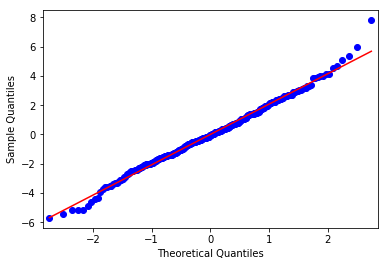

In [53]:
#Q-Q plot for normality
fig6i=sm.qqplot(reg6_2.resid, line='r')

So, this hasn't worked as being a better explanatory variable. Top end residuals are even worse.

# Course Three Week Four

## Run Logistic Regression

Need to create a binary response variable. I will use 'Crime - Average score' as the basis for binary response variable but it needs to be converted from a quantitive variable. To make more 'binarily' interesting, I will transform the highest quartile of 'Crime - Average score' into a High Crime = 1 categoric variable. The lower 3 quartiles of 'Crime - Average score' will be High Crime = 0.

In [54]:
# A reminder what is in our main dataframe
print(df_week03.head(0))

Empty DataFrame
Columns: [Area Code, Region, Area Name, Obesity 45, Obesity 1011, IMD - Average score, GDHI, Income - Average score, Income Deprivation Affecting Children Index (IDACI) - Average score, Employment - Average score, Education, Skills and Training - Average score, Health Deprivation and Disability - Average score, Crime - Average score, Barriers to Housing and Services - Average score, Living Environment - Average score, Income_Deprivation, Crime_Average_score, Health_Cat, ExplanVar01, Obesity_1011, IncomeDeprivationAffectingChildrenIndex(IDACI)Averagescore_c, Education,SkillsandTrainingAveragescore_c, CrimeAveragescore_c, BarrierstoHousingandServicesAveragescore_c, LivingEnvironmentAveragescore_c, Obesity45, Obesity1011, IDACI_c, EducationSkillsandTrainingAveragescore_c, HealthDeprivationandDisabilityAveragescore_c, IncomeAveragescore]
Index: []

[0 rows x 31 columns]


Lets's create another (slimmer) dataframe to work on, and take out all the spaces, commas and dashes in string names. Finally check by printing headers.

In [55]:
vars = ['Obesity1011', 'GDHI', 'Income - Average score', 'Income Deprivation Affecting Children Index (IDACI) - Average score', 'Employment - Average score', 'Education, Skills and Training - Average score', 'Health Deprivation and Disability - Average score', 'Crime - Average score', 'Barriers to Housing and Services - Average score', 'Living Environment - Average score']
df_week04 = df_week03[vars].copy(deep=True)
for var in vars[1:]:
    df_week04[var.replace(" ", "").replace("-","").replace(",","")] = df_week04[var]

# some more tidying up
# remove vars we want to keep from the list to remove
vars.remove('Obesity1011')
vars.remove('GDHI')
# remove the vars we don't want
df_week04.drop(columns=vars, axis = 1, inplace=True)
df_week04['IDACI'] = df_week04['IncomeDeprivationAffectingChildrenIndex(IDACI)Averagescore']
df_week04.drop(columns=['IncomeDeprivationAffectingChildrenIndex(IDACI)Averagescore'], axis = 1, inplace=True)
print(df_week04.head(0))


Empty DataFrame
Columns: [Obesity1011, GDHI, IncomeAveragescore, EmploymentAveragescore, EducationSkillsandTrainingAveragescore, HealthDeprivationandDisabilityAveragescore, CrimeAveragescore, BarrierstoHousingandServicesAveragescore, LivingEnvironmentAveragescore, IDACI]
Index: []


Use 'CrimeAverageScore' to create a binary categoric variable as described above.

In [56]:
# create desired cutoff within 'CrimeAverageScore' column
CrimeMin = df_week04.CrimeAveragescore.min()
CrimeMax = df_week04.CrimeAveragescore.max()
print(CrimeMin, CrimeMax)
cutoff = (CrimeMax-CrimeMin)*0.75 + CrimeMin
print(cutoff)

-1.125 1.019
0.4830000000000001


In [57]:
# use a crime_category function, lambda and 'apply' command to 
# iterate across 'CrimeAveragescore' rows and create the desired CrimeCat binary variable column
def crime_category(x, cutoff):
    if x < cutoff:
        return 0
    else:
        return 1

# N.B. cutoff already defined above
df_week04['CrimeCat'] = df_week04.apply(lambda row: crime_category(row['CrimeAveragescore'], cutoff), axis=1)

Now test.

In [58]:
print(df_week04[['CrimeAveragescore','CrimeCat']][:10])

   CrimeAveragescore  CrimeCat
0              0.078         0
1              0.633         1
2             -0.013         0
3             -0.263         0
4              0.224         0
5              0.331         0
6             -0.124         0
7              0.484         1
8              0.831         1
9              0.808         1


OK, that all works and we have a binary response variable 'CrimeCat'. (cutoff is given as 0.483, above.)

Now to choose initial explanatory variables: I'll choose ['GDHI', 'IncomeAveragescore', 'EmploymentAveragescore','LivingEnvironmentAveragescore'] as initial list, in that order.

In [59]:
# logistic regression with 'GDHI'
lreg1 = smf.logit(formula = 'CrimeCat ~ GDHI', data = df_week04).fit()
print (lreg1.summary())

# odds ratios
print ("Odds Ratios")
print (np.exp(lreg1.params))

# odd ratios with 95% confidence intervals
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.348567
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               CrimeCat   No. Observations:                  324
Model:                          Logit   Df Residuals:                      322
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:               0.0007601
Time:                        16:04:45   Log-Likelihood:                -112.94
converged:                       True   LL-Null:                       -113.02
                                        LLR p-value:                    0.6785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7877      0.745     -2.398      0.016      -3.249      -0.327
GDHI       -1.462e-05   3.66e

Result very interesting: coefficient is very low, p-value very high and odds ratios nearly = 1 (with 95% conidence interval). This shows that there is almost no association between GDHI (Gross Domestic Household Income in an English local authority area) and the high crime binary categorical variable in a local authority area.

So repeat this with 'IncomeAveragescore'.

In [60]:
# logistic regression with 'IncomeAveragescore'
lreg2 = smf.logit(formula = 'CrimeCat ~ IncomeAveragescore', data = df_week04).fit()
print (lreg2.summary())

# odds ratios
print ("Odds Ratios")
print (np.exp(lreg2.params))

# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.230244
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               CrimeCat   No. Observations:                  324
Model:                          Logit   Df Residuals:                      322
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:                  0.3400
Time:                        16:04:45   Log-Likelihood:                -74.599
converged:                       True   LL-Null:                       -113.02
                                        LLR p-value:                 1.849e-18
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.8417      0.980     -8.003      0.000      -9.762      -5.921
Incom

Result also very interesting! Coefficient is very high at nearly 36, with a 95% C.I. between 25.5 and 46. The p-value is very low and odds ratios huge at ~3.5e+15. This shows that there is a very high association between IncomeAveragescore and the high crime binary categorical variable in a local authority area. A 1 unit increase in Income deprivation increases the odds of being in the high crime category by 35 times.

Now add 'EmploymentAveragescore' to test if a confounding variable.

In [61]:
# logistic regression with 'IncomeAveragescore' and 'EmploymentAveragescore'
lreg3 = smf.logit(formula = 'CrimeCat ~ IncomeAveragescore + EmploymentAveragescore', data = df_week04).fit()
print (lreg3.summary())

# odd ratios with 95% confidence intervals
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.156674
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               CrimeCat   No. Observations:                  324
Model:                          Logit   Df Residuals:                      321
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:                  0.5509
Time:                        16:04:45   Log-Likelihood:                -50.763
converged:                       True   LL-Null:                       -113.02
                                        LLR p-value:                 9.146e-28
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.6081      1.146     -6.637      0.000      -9.855      

Adding 'EmploymentAverageScore' has improved the Pseudo R-squared coefficient to 55% from 34% for the previous model.  The 'EmploymentAverageScore' is statistically siginificant on its own.<br><br>
Let's initially look at impact on already-in 'IncomeAveragescore' variable. This is still statistically significant (p-value <0.001) and the coefficient is higher. Its odds ratio (controlling for 'EmploymentAverageScore') is even higher at 5.6e+49.<br><br>
'EmploymentAverageScore' is a confounding variable as it has significantly changed the parameters for 'IncomeAveragescore' whilst being very significant itself. Notably the coefficient is strongly negative. That says ~"as Employment deprivation gets worse, the chances of being in a high crime area are lower."  This is somewhat counter-intuitive, but does tie-in with the increase in postive odds ratio (& coefficient) for 'IncomeAveragescore'.

In [62]:
# logistic regression with 'IncomeAveragescore', 'EmploymentAveragescore' and 'LivingEnvironmentAveragescore'
lreg4 = smf.logit(formula = 'CrimeCat ~ IncomeAveragescore + EmploymentAveragescore + HealthDeprivationandDisabilityAveragescore', data = df_week04).fit()
print (lreg4.summary())

# odd ratios with 95% confidence intervals
params = lreg4.params
conf = lreg4.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.156621
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               CrimeCat   No. Observations:                  324
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:                  0.5510
Time:                        16:04:46   Log-Likelihood:                -50.745
converged:                       True   LL-Null:                       -113.02
                                        LLR p-value:                 8.067e-27
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   

Adding 'LivingEnvironmentAveragescore' has had no impact on Pseudo R-squared, is not statistically significant (p-value  of 0.527) and has an odds ratio ~= 1 (at 0.963). So this is not a confounding variable and does not improve the model.

I repeated this analysis also for BarrierstoHousingandServicesAveragescore. The result was very similar, also statistically insiginificant. (Same when including either of 'EducationSkillsandTrainingAveragescore' and 'HealthDeprivationandDisabilityAveragescore'.)

So essentially the model of explaining binary categorical variable CrimeCat only works for 'IncomeAveragescore' and 'EmploymentAveragescore', though the latter (counter-intuitively) in a negative sense.

### An alternative categorical approach

The approach to date used the 'CrimeCat' = 1 to be the top quartile in terms of measurement on the scale between max and min values.  Let's instead look at being 'CrimeCat' = 1 being +1 SD above the mean value.  (Numbers have been standardised by the researchers anyway.) Does this make a difference?

In [63]:
# create revised desired cutoff within 'CrimeAverageScore' column where 'CrimeCat' = 1  when the value is +1SD above the mean
CrimeMean = df_week04.CrimeAveragescore.mean()
CrimeStd = df_week04.CrimeAveragescore.std()
print(CrimeMean, CrimeStd)
cutoff2 = CrimeMean + CrimeStd
print(cutoff2)

-0.12055246913580246 0.45936626863048435
0.3388137994946819


In [64]:
# Create a CrimeCat2 binary categorical variable.
# N.B. cutoff2 defined above
df_week04['CrimeCat2'] = df_week04.apply(lambda row: crime_category(row['CrimeAveragescore'], cutoff2), axis=1)

Do last good logistic regression again.

In [65]:
# logistic regression with 'IncomeAveragescore' and 'EmploymentAveragescore'
lreg5 = smf.logit(formula = 'CrimeCat2 ~ IncomeAveragescore + EmploymentAveragescore', data = df_week04).fit()
print (lreg5.summary())

# odd ratios with 95% confidence intervals
params = lreg5.params
conf = lreg5.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.209475
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              CrimeCat2   No. Observations:                  324
Model:                          Logit   Df Residuals:                      321
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:                  0.5497
Time:                        16:04:46   Log-Likelihood:                -67.870
converged:                       True   LL-Null:                       -150.71
                                        LLR p-value:                 1.053e-36
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.2996      0.993     -7.349      0.000      -9.246      

Same again with 'CrimeCat' = 1 just being above mean value.

In [66]:
# cutoff3 at mean value
cutoff3 = CrimeMean 
print(cutoff3)
# Create a CrimeCat3 binary categorical variable.
# N.B. cutoff3 defined above
df_week04['CrimeCat3'] = df_week04.apply(lambda row: crime_category(row['CrimeAveragescore'], cutoff3), axis=1)

-0.12055246913580246


Do last good logistic regression again.

In [67]:
# logistic regression with 'IncomeAveragescore' and 'EmploymentAveragescore'
lreg6 = smf.logit(formula = 'CrimeCat2 ~ IncomeAveragescore + EmploymentAveragescore', data = df_week04).fit()
print (lreg6.summary())

# odd ratios with 95% confidence intervals
params = lreg6.params
conf = lreg6.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.209475
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              CrimeCat2   No. Observations:                  324
Model:                          Logit   Df Residuals:                      321
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jul 2018   Pseudo R-squ.:                  0.5497
Time:                        16:04:46   Log-Likelihood:                -67.870
converged:                       True   LL-Null:                       -150.71
                                        LLR p-value:                 1.053e-36
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.2996      0.993     -7.349      0.000      -9.246      

Last two variations made little difference.

# Course Four Week One

## Running a Classification Tree

### Task

Perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

### Data Management

I need to create a binary response variable. I will use 'Obesity1011' as the basis for binary response variable but it needs to be converted from a quantitive variable. To make more 'binarily' interesting, I will transform the highest readings of 'Obesity1011' into a HighObesity1011 = 1 categoric variable.These high readings will be where Obesity1011 is +1 SD above the mean value. The lower values of 'Obesity1011' will be HighObesity1011 = 0. 

Quickly looking at the frequency distribution for Obesity1011, the way of making a categoric variable seems reasonable to do.

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


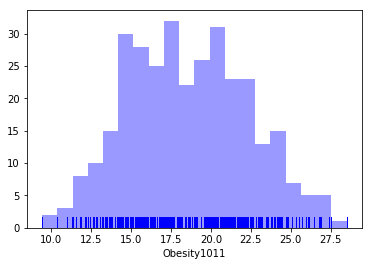

In [68]:
sns.distplot(df_week04['Obesity1011'], bins = 20, kde=False, rug=True, color = "Blue")
plt.show()

Following creates the categoric variable.

In [69]:
# Create desired cutoff for 'Obesity1011' column so we can create 'HighObesity1011' = 1  when the value is +1SD above the mean
ObesityMean = df_week04.Obesity1011.mean()
ObesityStd = df_week04.Obesity1011.std()
print(ObesityMean, ObesityStd)
cutoff3 = ObesityMean + ObesityStd
print(cutoff3)

18.57666420406482 3.7558997017480733
22.332563905812894


In [70]:
# Create the 'HighObesity1011' binary categorical variable.
# N.B. cutoff3 defined above; also can use the previous crime_category function that makes either 1 or 0
df_week04['HighObesity1011'] = df_week04.apply(lambda row: crime_category(row['Obesity1011'], cutoff3), axis=1)
print(df_week04[['Obesity1011','HighObesity1011']][:10])

   Obesity1011  HighObesity1011
0    24.170616                1
1    23.953488                1
2    22.464789                1
3    21.218962                0
4    21.035058                0
5    22.811854                1
6    18.686646                0
7    22.168441                0
8    22.508251                1
9    23.551989                1


OK, that all works and we have a binary response variable 'HighObesity1011'. (cutoff is given as 22.332, above.)



### Run a classification tree

In [71]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

/Users/RAhmed/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Remind ourselves what is in df_week04

In [72]:
print(df_week04.head(0))

Empty DataFrame
Columns: [Obesity1011, GDHI, IncomeAveragescore, EmploymentAveragescore, EducationSkillsandTrainingAveragescore, HealthDeprivationandDisabilityAveragescore, CrimeAveragescore, BarrierstoHousingandServicesAveragescore, LivingEnvironmentAveragescore, IDACI, CrimeCat, CrimeCat2, CrimeCat3, HighObesity1011]
Index: []


pred_train.shape: (194, 9)
pred_test.shape: (130, 9)
tar_train.shape: (194,)
tar_test.shape: (130,)
Confusion matrix:
[[107   5]
 [  7  11]]
Accuracy score:
0.9076923076923077


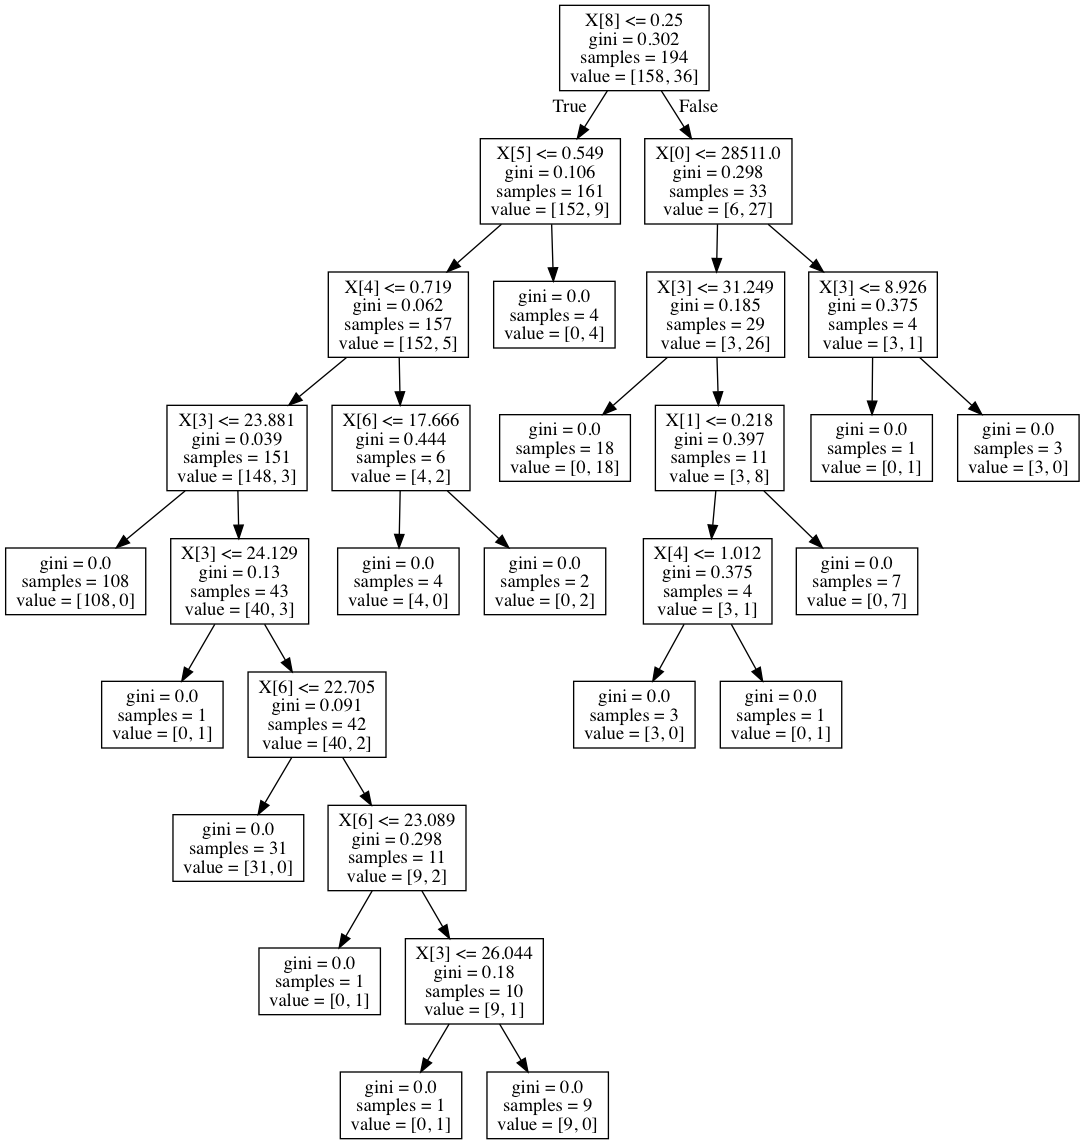

In [73]:
# Split into training and testing sets
predictors = df_week04[['GDHI', 'IncomeAveragescore', 'EmploymentAveragescore', 'EducationSkillsandTrainingAveragescore', 'HealthDeprivationandDisabilityAveragescore', 'CrimeAveragescore', 'BarrierstoHousingandServicesAveragescore', 'LivingEnvironmentAveragescore', 'IDACI']]
targets = df_week04.HighObesity1011

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

print("pred_train.shape:", pred_train.shape)
print("pred_test.shape:", pred_test.shape)
print("tar_train.shape:", tar_train.shape)
print("tar_test.shape:", tar_test.shape)

# Build model on training data; initiate classifier from sklearn, then fit it with the training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

# predict for the test values and create confusion matrix
predictions=classifier.predict(pred_test)
print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print("Accuracy score:")
print(sklearn.metrics.accuracy_score(tar_test, predictions))

#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

Want to print what the different X[n] are

In [74]:
for count, var in enumerate(predictors):
    print('X[',count,']'+ var)

X[ 0 ]GDHI
X[ 1 ]IncomeAveragescore
X[ 2 ]EmploymentAveragescore
X[ 3 ]EducationSkillsandTrainingAveragescore
X[ 4 ]HealthDeprivationandDisabilityAveragescore
X[ 5 ]CrimeAveragescore
X[ 6 ]BarrierstoHousingandServicesAveragescore
X[ 7 ]LivingEnvironmentAveragescore
X[ 8 ]IDACI


### Note on statistical techniques

Essentially, we have finished the HW excepting the analysis.  However, this week's module gives no discussion of over-fitting and pruning.  (I believe this is part of next week's topic.) Also, decision trees (classification trees/regression trees) are not state of the art, really are building blocks for better techniques such as random forests.

** By the way, the whole masterful Hastie and Tibshirani (H&T) Stanford MOOC on Statistical Learning is given here**:<br>
https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/

For this week, the discussion and solution of how to cross validate your results are given below. (H&T use k-fold cross validation and bootstrapping to resample data to train it and get better idea of errors):<br>
https://www.coursera.org/learn/machine-learning-data-analysis/discussions/weeks/1/threads/Xu31c88pEeWOeA4jiPAy1w
https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn

### k-fold cross validation

(See H&T Cpt 5.) This is a Validation Set approach. Suppose that we would like to estimate the test error associated with fitting a particular statistical learning method on a set of observations. The validation set approach involves randomly dividing the available set of observations into two parts, a training set and a validation set or hold-out set. The model is fit on the training set, and the fitted model is used to predict the responses for the observations in the validation set. The resulting validation set error rate — typically assessed using MSE in the case of a quantitative response — provides an estimate of the test error rate. If we repeat the process of randomly splitting the sample set into twoparts, we will get a somewhat different estimate for the test MSE. Cross-validation improves on this approach of getting differnet results.

The k-fold CV approach involves randomly dividing the set of observations into k groups, or folds, of approximately
equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds. (E.g. for 10-fold validation, the 90% set is the training set.) The mean squared error, MSE1, is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error.<br><br>
Excellent discussion at:<br>
https://www.youtube.com/watch?v=6dbrR-WymjI

In [75]:
# With k-fold cross validation. 
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

# This method gives k-fold cross validation method; uses cross_val_score which takes care of train/test split by itself
x = predictors
y = df_week04['HighObesity1011']

# clf is commonly abbreviation for classifier
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(estimator=clf, X=x, y=y, cv=10, n_jobs=4)
print("Mean of cross validation scores:", scores.mean())

Mean of cross validation scores: 0.8732007575757577


So we have a robust cross-validated model that has 87% accuracy. Now want to check with number of modes required.  The range is for a 'reasonable' number of nodes.

[0.8732954545454545, 0.8950757575757576, 0.8796401515151515, 0.8888257575757577, 0.8826704545454545, 0.8856060606060605]


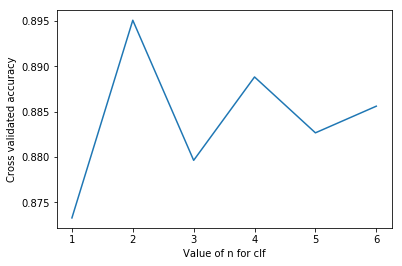

In [76]:
# this method gives cross validation for increasing depth of tree; the above way doesn't optimise for # nodes
n_scores = []
n_range = range(1,7)
for n in n_range:
    clf = tree.DecisionTreeClassifier(max_depth=n)
    # Perform 10-fold cross validation (10 recommended in youtube link above). n_jobs is to do with processor core use
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=10, n_jobs=4)
    n_scores.append((scores.mean()))
print(n_scores)

# visualise; plot number of nodes versus cross-validation accuracy
import matplotlib.pyplot as plt
plt.xlabel('Value of n for clf')
plt.ylabel('Cross validated accuracy')
plt.plot(n_range, n_scores)

The results show that increasing the depth even beyond 2 levels doesn't improve cross validation model accuracy. So will re-run the test_split method with depth 2.

Confusion matrix:
[[82  1]
 [ 8  7]]
Accuracy score:
0.9081632653061225


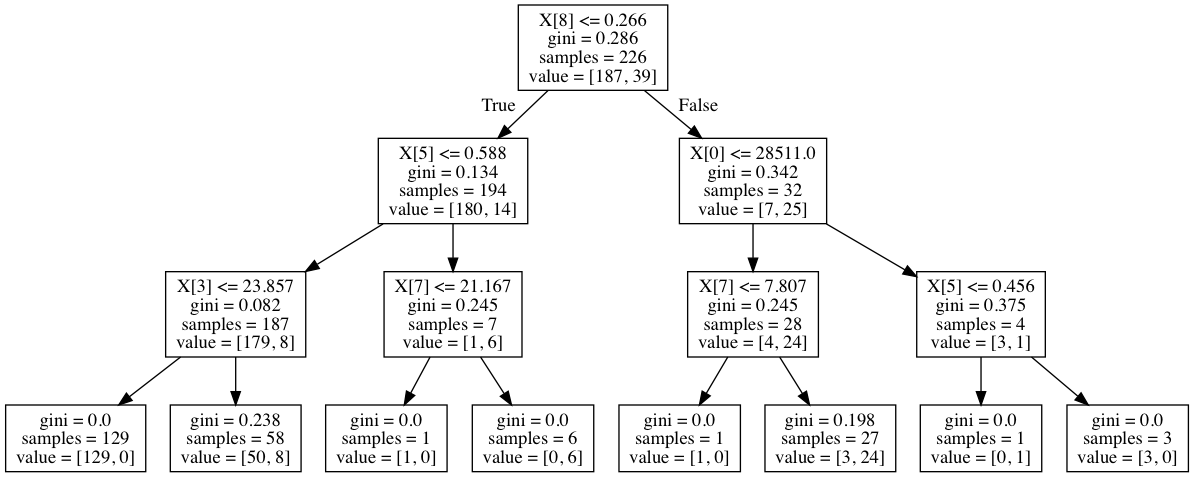

In [77]:
# Build model on training data; initiate classifier from sklearn, then fit it with the training data
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=2)
classifier=DecisionTreeClassifier(max_depth=3)
classifier=classifier.fit(pred_train,tar_train)

# predict for the test values and create confusion matrix
predictions=classifier.predict(pred_test)
print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print("Accuracy score:")
print(sklearn.metrics.accuracy_score(tar_test, predictions))

#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

### Comment on cross validation method

The one issue remaining is how to interpret the cross validation method since each iteration potentially produces a different classification tree.  One could iterate the programme fairly simply to produce a tree for each iteration and visually inspect.  However this is quite cumbersome, so I will wait for next method on the course.

The above classification tree with depth 3 is much more satisfactory than the initial model, above: variables are not repeated in the tree and the accuracy score is higher - for a simpler model!

# Course Four Week Two

## Running a Random Forest

### Task

Perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

## Data management

The task is to use a binary response variable, and I will use HighObesity1011 as the binary response variable, as per last week. (It is already converted from a quantitive variable.) HighObesity1011 = 1 is where the quantitive  Obesity1011 is +1 SD above the mean value. The lower values of 'Obesity1011' will be HighObesity1011 = 0.

### Run a random forest

In [78]:
# import all necessary libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
# feature importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

Now we run a model on a training set.  **Why? Is really well explained in link here:**<br>
https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/<br>
Basically it says we folow a standard workflow and build a model on test data. We then train a better model and see if that works better than the test data.<br><br>
**Comments in the code show the workflow steps,** and done following Chris Albon link above. (Better explanation than the MOOC.) **Note** that the course's sample code that displays the relative feature importance is done on **ExtraTreesClassifier**, not **RandomForestClassifier** (so somewhat inconsistent).  The difference between the two types of classifier is given at:<br>
https://stackoverflow.com/questions/22409855/randomforestclassifier-vs-extratreesclassifier-in-scikit-learn<br>
I added code to also show the results with RandomForestClassifier, before the ExtraTreesClassifier.

In [79]:
# use df_week04 dataset, that is already active in the Jupyter notebook
predictors = df_week04[['GDHI', 'IncomeAveragescore', 'EmploymentAveragescore', 'EducationSkillsandTrainingAveragescore', 'HealthDeprivationandDisabilityAveragescore', 'CrimeAveragescore', 'BarrierstoHousingandServicesAveragescore', 'LivingEnvironmentAveragescore', 'IDACI']]
targets = df_week04.HighObesity1011

# Build model on training data
from sklearn.ensemble import RandomForestClassifier
# classifier (sometimes use clf) is initiated
classifier=RandomForestClassifier(n_estimators=25)
# next step trains the model
classifier=classifier.fit(pred_train,tar_train)
# now we apply the classifier to the test data
predictions=classifier.predict(pred_test)

# we look at confusion matrix and accuracy of prediction on test values
print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print("Accuracy score:")
print(sklearn.metrics.accuracy_score(tar_test, predictions))
print()
# display the relative importance of each attribute using RandomForestClassifier
# make this more readable by having the names of the predictors and having sorted
zipped = zip(predictors, classifier.feature_importances_)
my_list = list(zipped)
my_list.sort(key=lambda tup: tup[1], reverse=True)
print('RandomForestClassifier relative feature importance:')
for item in my_list:
    print('{0:42} {1:>42}'.format(item[0], item[1]))

# fit an Extra Trees model to the data (instead of Random Forest)
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# make this more readable by having the names of the predictors and having sorted
zipped = zip(predictors, model.feature_importances_)
my_list = list(zipped)
my_list.sort(key=lambda tup: tup[1], reverse=True)
print()
print('ExtraTreesClassifier relative feature importance:')
for item in my_list:
    print('{0:42} {1:>42}'.format(item[0], item[1]))

Confusion matrix:
[[82  1]
 [ 7  8]]
Accuracy score:
0.9183673469387755

RandomForestClassifier relative feature importance:
IDACI                                                              0.3016981677681279
CrimeAveragescore                                                 0.19547056505295912
GDHI                                                              0.11391904999164079
IncomeAveragescore                                                 0.0974562818653157
EmploymentAveragescore                                             0.0721894895692028
BarrierstoHousingandServicesAveragescore                          0.07214076507228921
EducationSkillsandTrainingAveragescore                            0.05188620704616053
LivingEnvironmentAveragescore                                     0.05052172727563845
HealthDeprivationandDisabilityAveragescore                       0.044717746358665496

ExtraTreesClassifier relative feature importance:
IDACI                                             

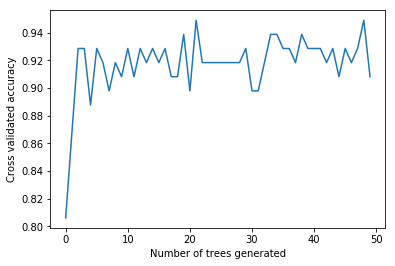

In [80]:
# Running a different number of trees and see the effect of that on the accuracy of the prediction
trees=range(50)
accuracy=np.zeros(50)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.xlabel('Number of trees generated')
plt.ylabel('Cross validated accuracy')
plt.plot(trees, accuracy)

Different results each time.

### Professor's summary of random forest

"In my opinion, the main weakness of random forests is simply that the results are less satisfying, since no trees are actually interpreted. Instead, the forest of trees is used to rank the importance of variables in predicting the target. Thus we get a sense of the most important predictive variables but not necessarily their relationships to one another."

# Notes to self from ISLR book, Hastie et al

Decision trees,having a 2-split, will have very high variance as I noticed when doing Course Four Week One. Bagging, boosting, random forests, etc., are ways to get around that.<br><br>
Additional good material at:<br>
https://bradzzz.gitbooks.io/ga-seattle-dsi/content/dsi/dsi_06_trees_methods/3.1-lesson/readme.html

## Bagging

Bootstrap aggregating, aka bagging, helps combat this. You take repeated samples from a training data set and take average variance across all the samples.  Individual decision trees are grown deep (not pruned) so have high variance but low bias. Taking the average variance reduces it. Can be combined with hundreds/thousands of trees.<br><br>
**ISLR:** The number of trees B is not a critical parameter with bagging; using a very large value of B will not lead to overfitting. In practice we use a value of B sufficiently large that the error has settled down. Using
B = 100 is sufficient to achieve good performance in this example (heart data in book).<br><br>


## Bagging versus random forest

The main difference between bagging and random forests is the choice of predictor subset size m.<br><br>The predictions from the bagged trees will be highly correlated. Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. In particular, this means that bagging will not lead to a substantial reduction in variance over a single tree in this setting. Random forests overcome this problem by forcing each split to consider only a subset of the predictors. Therefore, on average (p − m)/p of the splits will not even consider the strong predictor, and so other predictors will have more of a chance. We can think of this process as decorrelating the trees, thereby making the average of the resulting trees less variable and hence more reliable.<br><br>
Basic bagging of a decision tree can be done as shown in:<br>
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/<br>
**Example code:**<br>
...<br>
cart = DecisionTreeClassifier()<br>
num_trees = 100<br>
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)<br>
...

## Random Forests

In RandomForestClassifier number of features you are allowed to condider at each node is set at "auto" as the square root of the number of features, in line with how the heart data example is done in the text.  This is the essential difference with bagging.<br><br>
**My go above:** Default in RandomForestClassifier is n_estimators=25 trees.  That's likely ok (but perhaps too conservative?) as we have a small classification tree where end nodes can quickly have a Gini value of zero. (And so stop.)

## Boosting

ISLR talks also about boosting.  This is where you build a tree and shrink it by a parameter ℷ (lambda) and check what the residuals are between predictions and actuals. You build another tree on these residuals and repeat.<br><br>
Learning slowly is better, so typical lambdas are 0.01 or 0.001.  So you need a lot of trees grown!  Works (and often done) as trees of only depth 1 ('stump') or 2.  See ISLR for discussion.<br><br>
Code shown at:<br>
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

## Extra Tree

Finally ExtraTreeClassifier. Is like RandomForestClassifier, except instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.<br><br>
Explained at:<br>
http://scikit-learn.org/stable/modules/ensemble.html

## Classifier / Regression code note


So far we've been using see (e.g.) ExtraTreesClassifier, but for regressions we would use  ExtraTreesRegressor, and same for other code used so far.

# Course Four Week Three

## Running a Lasso Regression Analysis

### Task

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

Begin with necessary imports.

In [81]:
# imports
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

In [82]:
# select predictor variables and target variable as separate data sets  
predictors = df_week04[['GDHI', 'IncomeAveragescore', 'EmploymentAveragescore', 'EducationSkillsandTrainingAveragescore', 'HealthDeprivationandDisabilityAveragescore', 'CrimeAveragescore', 'BarrierstoHousingandServicesAveragescore', 'LivingEnvironmentAveragescore', 'IDACI']]
target = df_week04.HighObesity1011

In [95]:
# standardize predictors to have mean=0 and sd=1
from sklearn import preprocessing
stan_predictors = predictors.copy()

for item in stan_predictors:
    stan_predictors[item]=preprocessing.scale(stan_predictors[item].astype('float64'))
# test this works for one example, mean should ~=0, std should ~=1
print(stan_predictors.GDHI.mean(), stan_predictors.GDHI.std())

2.4671622769447924e-16 1.0015467913343832


In [96]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(stan_predictors, target, 
                                                              test_size=.3, random_state=123)
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

Code as per sample on course:

{'GDHI': -0.11167980765805946, 'IncomeAveragescore': 0.7654726318693991, 'EmploymentAveragescore': -0.49942738494915184, 'EducationSkillsandTrainingAveragescore': -0.05134203906230189, 'HealthDeprivationandDisabilityAveragescore': -0.07289248593712275, 'CrimeAveragescore': -0.06256789917656912, 'BarrierstoHousingandServicesAveragescore': 0.0014042745342690219, 'LivingEnvironmentAveragescore': -0.03493454778632772, 'IDACI': 0.026531062879293722}
training data MSE
0.06218092545726254
test data MSE
0.10553111958271202
training data R-square
0.5356793934714705
test data R-square
0.29616606078307883


/Users/RAhmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
/Users/RAhmed/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


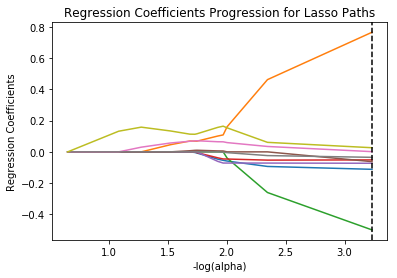

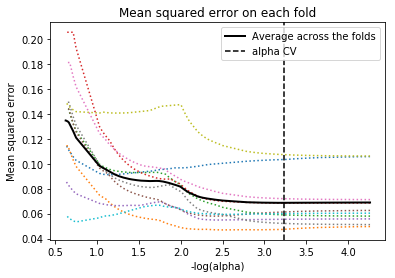

In [106]:
# print variable names and regression coefficients
print(dict(zip(stan_predictors.columns, model.coef_)))

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

**Use this code:** To benefit from the fixes in the discussion forum, use the following code (with discussion and own improvements):

('IncomeAveragescore', 0.44304068116051415)
('IDACI', 0.06220494505551943)
('BarrierstoHousingandServicesAveragescore', 0.053185192843982466)
('CrimeAveragescore', -0.013294102362278896)
('LivingEnvironmentAveragescore', -0.017034167072145223)
('GDHI', -0.05796296510340261)
('EducationSkillsandTrainingAveragescore', -0.0595811352479493)
('HealthDeprivationandDisabilityAveragescore', -0.060356627579548607)
('EmploymentAveragescore', -0.1901178615332889)

m_log_alphascv = 2.7708544408199374
alpha = 0.0016949057739441835

TEST RESULTS:
training data MSE
0.07401749111850078
test data MSE
0.0641657862641962
training data R-square
0.4918659440364857
test data R-square
0.4759794121757311


/Users/RAhmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


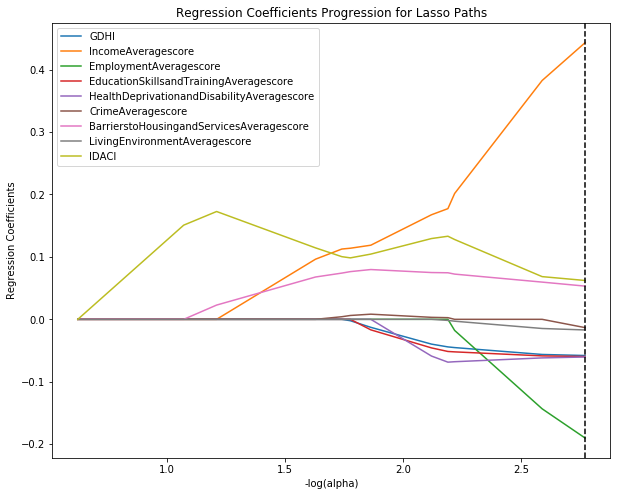

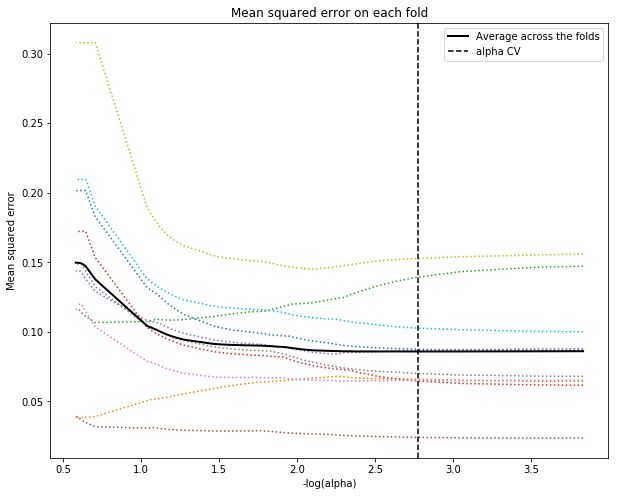

In [161]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(stan_predictors, target, 
                                                              test_size=.3, random_state=105)
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False, normalize=False).fit(pred_train,tar_train)

# print variable names and regression coefficients, in a sorted order
def sortbyvalue(dict):
    sortedByValueDict = sorted(dict.items(), key = lambda t:t[1], reverse=True)
    return sortedByValueDict

z = dict(zip(stan_predictors.columns, model.coef_))
for item in sortbyvalue(z):
    print(item)

# plot coefficient progression
plt.figure(figsize=(10,8))
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()

for i in range(len(predictors.columns)):  
    plt.plot(-np.log10(model.alphas_), model.coef_path_[i], label=predictors.columns[i]),plt.legend(loc='upper left')
   
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')


# plot mean square error for each fold
plt.figure(figsize=(10,8))
m_log_alphascv = -np.log10(model.cv_alphas_)
print("\nm_log_alphascv =", -np.log10(model.alpha_))
print("alpha =", 1/(10**-np.log10(model.alpha_)))

plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print("\nTEST RESULTS:")
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)


Thanks to the following link (excellent site) for the dictionary sort, above:
    https://www.youtube.com/watch?v=MGD_b2w_GU4

N.B. that LassoLarsCV is different from simple Lasso shown in ISLR. Is described here:
http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

LassoLarsCV uses Use the Akaike information criterion (AIC), the Bayes Information criterion (BIC) and cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.  The -log(alpha) is shown in the charts above. For random_state=105, this gives optimal -log(alpha) = 2.7708544408199374, in the printed output. <br><br>
Using https://www.symbolab.com/solver/logarithmic-equation-calculator/-log%5Cleft(x%5Cright)%20%3D%202.77, this gives alpha as 1/(10^2.77) = alpha = 0.00169. This is consistent with the typical values of lambda in the Boosting discussion above.  (I.e. learn slowly.)

The course's video here explains the LassoLarsCV model, where one variable is added at a time:<br>https://www.coursera.org/lecture/machine-learning-data-analysis/testing-a-lasso-regression-model-in-python-aqEsh?authMode=signup<br>Interestingly, the first chart works in the opposite sense to the one in ISLR, the smaller the -log(alpha) the larger the lambda penalty.

Above explains that alpha is what is generally called lambda, and is the penalty parameter. The value we calculated is the one where cross-validation error is least. (See ISLR, 6.2.3)  Copying what ISLR says: "In this case the value is relatively small, indicating that the optimal fit only involves a small amount of shrinkage relative to the least squares solution." 

##  Lasso versus Multiple Regression

In Course Three Week Three we ran multiple regression using least squares.  The variables were standardised to be the residuals after subtracting the mean, not quite the same as standardising to have mean zero and SD of one.<br><br>
In that case the best 3 explanatory variables were:'IDACI_c','BarrierstoHousingandServicesAveragescore_c', 'LivingEnvironmentAveragescore_c', with an R-square of 0.703, able to explain 70% of the variance of childhood obesity.<br><br>
Using Lasso, the best 3 explanatory variables were: 'IncomeAveragescore', 'EmploymentAveragescore' and 'IDACI'.  This was followed by 'BarrierstoHousingandServicesAverageScore', which was significant in normal multiple regression.<br><br>  
On our test data we had test data R-square of 0.476, which is smaller than the R-square of 0.703 for normal multiple regression.  Running this with several different random seeds did not make significant differences in the R-square for the Lasso technique.<br>
Also, note that the R-square for the test value was slighly lower than for the training value, showing a slight over-fitting of the training model.  Note that whether the R-square for the test value was higher or lower did depend on the random seed, showing any over-fitting is likely slight.

## Lasso or Multiple Regression for this data set?

What this Lasso does not do is to take any account of  multi-collinearity, which in Course Three Week Three we showed there was between several explanantory variables.  (Multi-collinearity can reduce the explanatory power of a model.) Hence, for this data set, standard multiple regression seems to be a better model than the Lasso model, as seen by its higher R-square.